## Import Library

In [524]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
import numpy as np
import umap.umap_ as umap
import joblib
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from sklearn.decomposition import PCA, TruncatedSVD
from matplotlib import cm
from sklearn.pipeline import Pipeline

In [362]:
# # Setting Set View Output
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_seq_items', None)
# pd.reset_option('display.max_seq_items')
# pd.reset_option('display.max_rows')
# pd.reset_option('display.max_columns')
# pd.reset_option('display.max_colwidth')

## Load Dataset

In [363]:
df_recipes = pd.read_csv('Food Ingredients and Recipe Dataset with Image Name Mapping.csv')
df_numFeature = pd.read_csv('epi_r.csv')

## Exploratory Data Analysis

### Data Recipes

In [364]:
df_recipes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13501 entries, 0 to 13500
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           13501 non-null  int64 
 1   Title                13496 non-null  object
 2   Ingredients          13501 non-null  object
 3   Instructions         13493 non-null  object
 4   Image_Name           13501 non-null  object
 5   Cleaned_Ingredients  13501 non-null  object
dtypes: int64(1), object(5)
memory usage: 633.0+ KB


In [365]:
df_recipes.shape

(13501, 6)

In [366]:
df_recipes.isnull().sum()

Unnamed: 0             0
Title                  5
Ingredients            0
Instructions           8
Image_Name             0
Cleaned_Ingredients    0
dtype: int64

In [367]:
df_recipes.duplicated().sum()

0

In [368]:
df_recipes[df_recipes.duplicated(subset="Ingredients", keep=False)]

,Unnamed: 0,Title,Ingredients,Instructions,Image_Name,Cleaned_Ingredients
174,174,White Russian,"['1½ oz. vodka', '¾ oz. Kahlúa', '¾ oz. heavy ...",Combine all the ingredients in a cocktail shak...,white-russian-simonson-3-ingredient-cocktails,"['1½ oz. vodka', '¾ oz. Kahlúa', '¾ oz. heavy ..."
351,351,Aviation,"['2 oz. Tanqueray gin', '0.75 oz. lemon juice'...","Shake with ice, then fine-strain into a chille...",aviation-cocktail-gin-violette,"['2 oz. Tanqueray gin', '0.75 oz. lemon juice'..."
356,356,Manhattan,"['2 ounces rye or bourbon whiskey', '1 ounce s...",In mixing glass or cocktail shaker filled with...,manhattan-238166,"['2 ounces rye or bourbon whiskey', '1 ounce s..."
360,360,Negroni,"['2 tablespoons (1 ounce) sweet vermouth', '2 ...","In chilled cocktail shaker or pint glass, stir...",negroni-351597,"['2 tablespoons (1 ounce) sweet vermouth', '2 ..."
549,549,Sazerac,"['1 cube or 1/2 teaspoon sugar', '4 dashes Pey...","In old-fashioned glass, add ice and set aside....",sazerac-237263,"['1 cube or 1/2 teaspoon sugar', '4 dashes Pey..."
2083,2083,Jammy Soft-Boiled Eggs,['4–8 large eggs'],Bring a large saucepan of water to a boil over...,jammy-soft-boiled-eggs,['4–8 large eggs']
2091,2091,Hard-Boiled Eggs,['4–8 large eggs'],Bring a large saucepan of water to a boil over...,hard-boiled-eggs-recipe,['4–8 large eggs']
2698,2698,Watermelon and Feta With Lime and Serrano Chil...,"['3 pounds seedless watermelon, rind removed, ...",Place the watermelon in a large mixing bowl. A...,watermelon-and-feta-salad-with-lime-and-serran...,"['3 pounds seedless watermelon, rind removed, ..."
2888,2888,Aviation,"['2 oz. Tanqueray gin', '0.75 oz. lemon juice'...","Shake with ice, then fine-strain into a chille...",aviation-cocktail,"['2 oz. Tanqueray gin', '0.75 oz. lemon juice'..."
2979,2979,"My Cobb Salad: Iceberg, Tomato, Avocado, Bacon...","['2 1/2 ounces smoked bacon, rind removed, cut...","In a large, dry skillet, brown the bacon over ...",cobb-salad-iceberg-tomato-avocado-bacon-and-bl...,"['2 1/2 ounces smoked bacon, rind removed, cut..."


In [369]:
df_recipes.columns

Index(['Unnamed: 0', 'Title', 'Ingredients', 'Instructions', 'Image_Name',
       'Cleaned_Ingredients'],
      dtype='object')

In [370]:
df_recipes.head()

,Unnamed: 0,Title,Ingredients,Instructions,Image_Name,Cleaned_Ingredients
0,0,Miso-Butter Roast Chicken With Acorn Squash Pa...,"['1 (3½–4-lb.) whole chicken', '2¾ tsp. kosher...","Pat chicken dry with paper towels, season all ...",miso-butter-roast-chicken-acorn-squash-panzanella,"['1 (3½–4-lb.) whole chicken', '2¾ tsp. kosher..."
1,1,Crispy Salt and Pepper Potatoes,"['2 large egg whites', '1 pound new potatoes (...",Preheat oven to 400°F and line a rimmed baking...,crispy-salt-and-pepper-potatoes-dan-kluger,"['2 large egg whites', '1 pound new potatoes (..."
2,2,Thanksgiving Mac and Cheese,"['1 cup evaporated milk', '1 cup whole milk', ...",Place a rack in middle of oven; preheat to 400...,thanksgiving-mac-and-cheese-erick-williams,"['1 cup evaporated milk', '1 cup whole milk', ..."
3,3,Italian Sausage and Bread Stuffing,"['1 (¾- to 1-pound) round Italian loaf, cut in...",Preheat oven to 350°F with rack in middle. Gen...,italian-sausage-and-bread-stuffing-240559,"['1 (¾- to 1-pound) round Italian loaf, cut in..."
4,4,Newton's Law,"['1 teaspoon dark brown sugar', '1 teaspoon ho...",Stir together brown sugar and hot water in a c...,newtons-law-apple-bourbon-cocktail,"['1 teaspoon dark brown sugar', '1 teaspoon ho..."


In [371]:
"""
Hasil EDA awal data receipt :
- Total row data : 13.501
- Total coulumn data : 6
- Data tersebut memiliki missing value pada Title & Instruction sebanyak :
  Title : 5
  Instructions : 8
- Data tersebut tidak memiliki duplikat data yang sama persis pada satu baris
- Data tersebut memiliki title yang sama namun ada ynag memiliki instruction dan ingredients yang berbeda
"""

'\nHasil EDA awal data receipt :\n- Total row data : 13.501\n- Total coulumn data : 6\n- Data tersebut memiliki missing value pada Title & Instruction sebanyak :\n  Title : 5\n  Instructions : 8\n- Data tersebut tidak memiliki duplikat data yang sama persis pada satu baris\n- Data tersebut memiliki title yang sama namun ada ynag memiliki instruction dan ingredients yang berbeda\n'

### Data numFeature (Nutrition & Binary Feature Ingredients_Tags)

In [372]:
df_numFeature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20052 entries, 0 to 20051
Columns: 680 entries, title to turkey
dtypes: float64(679), object(1)
memory usage: 104.0+ MB


In [373]:
df_numFeature.columns

Index(['title', 'rating', 'calories', 'protein', 'fat', 'sodium', '#cakeweek',
       '#wasteless', '22-minute meals', '3-ingredient recipes',
       '30 days of groceries', 'advance prep required', 'alabama', 'alaska',
       'alcoholic', 'almond', 'amaretto', 'anchovy', 'anise', 'anniversary',
       'anthony bourdain', 'aperitif', 'appetizer', 'apple', 'apple juice',
       'apricot', 'arizona', 'artichoke', 'arugula', 'asian pear', 'asparagus',
       'aspen', 'atlanta', 'australia', 'avocado', 'back to school',
       'backyard bbq', 'bacon', 'bake', 'banana', 'barley', 'basil', 'bass',
       'bastille day', 'bean', 'beef', 'beef rib', 'beef shank',
       'beef tenderloin', 'beer', 'beet', 'bell pepper', 'berry',
       'beverly hills', 'birthday', 'biscuit', 'bitters', 'blackberry',
       'blender', 'blue cheese', 'blueberry', 'boil', 'bok choy',
       'bon appétit', 'bon app��tit', 'boston', 'bourbon', 'braise', 'bran',
       'brandy', 'bread', 'breadcrumbs', 'breakfast', '

In [374]:
df_numFeature.shape

(20052, 680)

In [375]:
missingCols = df_numFeature.isnull().sum()
print("Missing cols :")
missingCols[missingCols > 0]

Missing cols :


calories    4117
protein     4162
fat         4183
sodium      4119
dtype: int64

In [376]:
print("Total row duplicate : ",df_numFeature.duplicated().sum())

Total row duplicate :  1801


In [377]:
df_numFeature.describe()

,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
count,20052.000000,1.593500e+04,15890.000000,1.586900e+04,1.593300e+04,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,...,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000
mean,3.714467,6.322958e+03,100.160793,3.468775e+02,6.225975e+03,0.000299,0.000050,0.000848,0.001346,0.000349,...,0.001247,0.026332,0.000050,0.000299,0.014861,0.000150,0.000349,0.001396,0.000948,0.022741
std,1.340829,3.590460e+05,3840.318527,2.045611e+04,3.333182e+05,0.017296,0.007062,0.029105,0.036671,0.018681,...,0.035288,0.160123,0.007062,0.017296,0.121001,0.012231,0.018681,0.037343,0.030768,0.149080
min,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.750000,1.980000e+02,3.000000,7.000000e+00,8.000000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.375000,3.310000e+02,8.000000,1.700000e+01,2.940000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.375000,5.860000e+02,27.000000,3.300000e+01,7.110000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,3.011122e+07,236489.000000,1.722763e+06,2.767511e+07,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [378]:
nutri_cols = ["calories", "protein", "fat", "sodium"]
df_nutri = df_numFeature[nutri_cols]

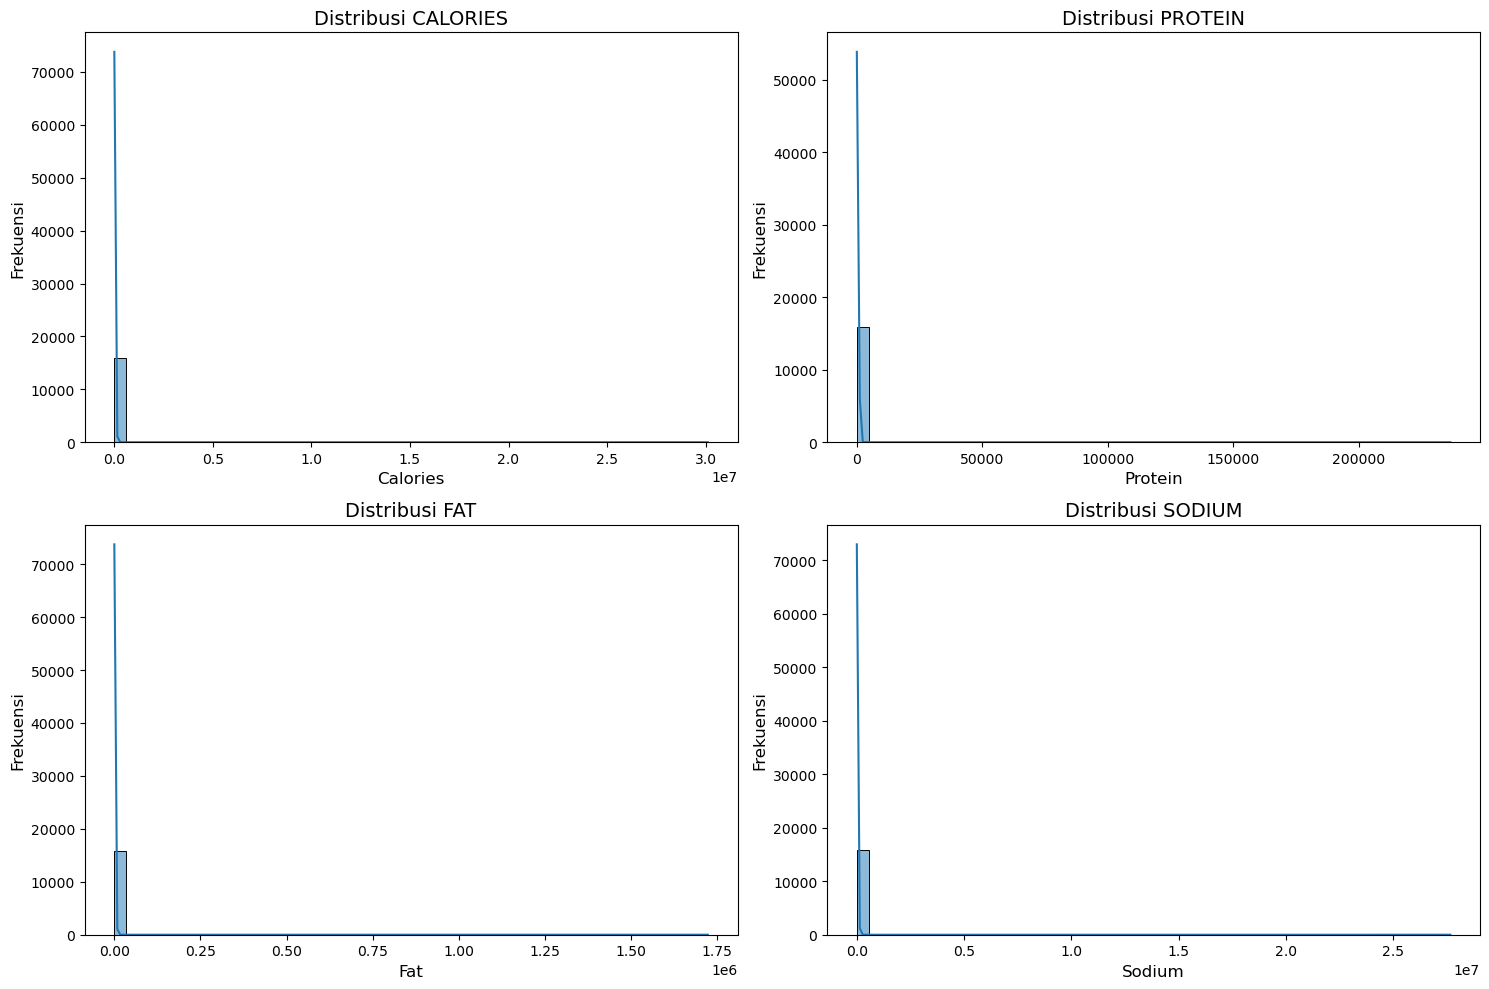

In [379]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(nutri_cols):
    plt.subplot(2, 2, i + 1) # Membuat 4 subplot (2 baris, 2 kolom)
    
    # Menggunakan displot dengan parameter hist_kws untuk batas bin
    sns.histplot(df_nutri[col], kde=True, bins=50) 
    
    plt.title(f'Distribusi {col.upper()}', fontsize=14)
    plt.xlabel(col.capitalize(), fontsize=12)
    plt.ylabel('Frekuensi', fontsize=12)

plt.tight_layout()
plt.show()

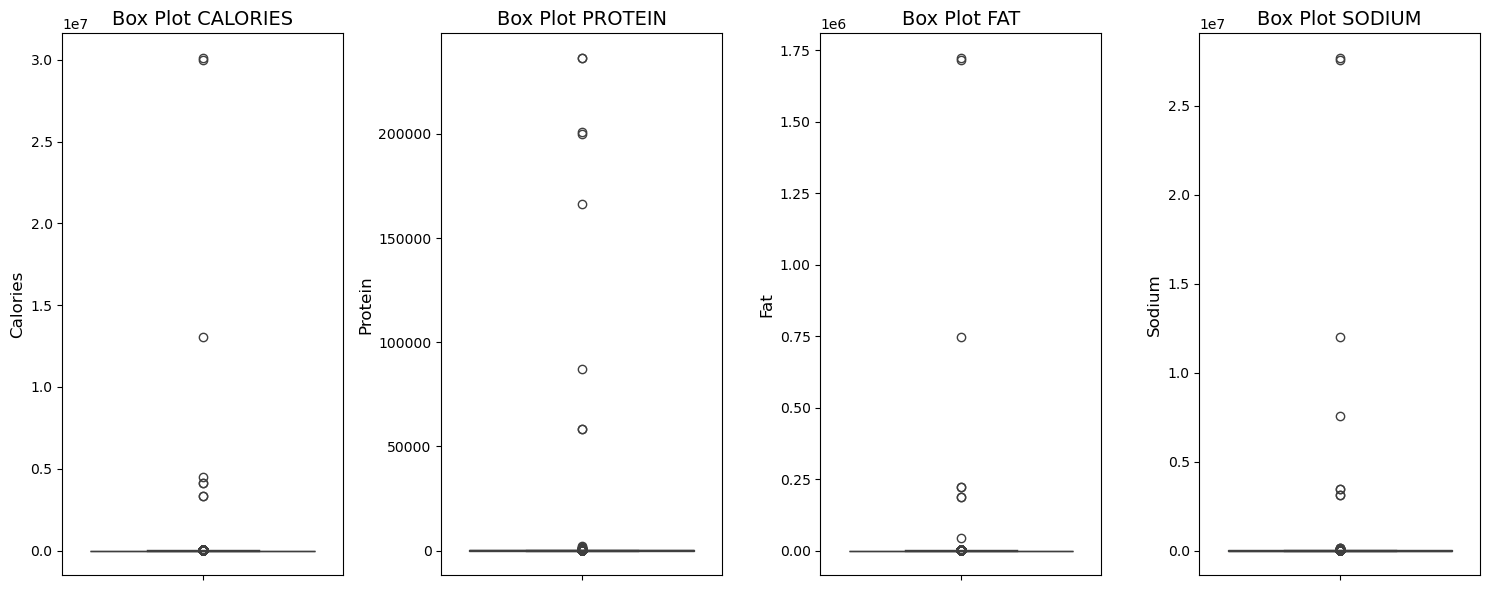

In [380]:
plt.figure(figsize=(15, 6))

for i, col in enumerate(nutri_cols):
    plt.subplot(1, 4, i + 1) # Membuat 4 subplot (1 baris, 4 kolom)
    
    # Menggunakan Box Plot
    sns.boxplot(y=df_nutri[col]) 
    
    plt.title(f'Box Plot {col.upper()}', fontsize=14)
    plt.ylabel(col.capitalize(), fontsize=12)

plt.tight_layout()
plt.show()

In [381]:
df_numFeature[nutri_cols].skew()

calories    77.020976
protein     53.564238
fat         78.151565
sodium      75.306959
dtype: float64

In [382]:
for col in nutri_cols:
    print(f"--- KOLOM: {col.upper()} ---")

    # 1. Menampilkan 10 Data Terbesar (Nilai Ekstrem Kanan)
    print(f"\n10 RESEP DENGAN {col.upper()} TERBESAR:")
    
    # Menggunakan nlargest dan memilih kolom Title (jika ada di df_numFeature) 
    # serta kolom nutrisi yang bersangkutan untuk konteks.
    largest = df_numFeature.nlargest(10, col)[['title', col]]
    print(largest)
    
    # 2. Menampilkan 10 Data Terkecil (Nilai Ekstrem Kiri/Dekat Nol)
    print(f"\n10 RESEP DENGAN {col.upper()} TERKECIL:")
    
    # Menggunakan nsmallest
    smallest = df_numFeature.nsmallest(10, col)[['title', col]]
    print(smallest)
    
    print("\n" + "="*40)

--- KOLOM: CALORIES ---

10 RESEP DENGAN CALORIES TERBESAR:
                                                   title    calories
11391              Pear-Cranberry Mincemeat Lattice Pie   30111218.0
6368                       Deep-Dish Wild Blueberry Pie   29997918.0
19672                 Apricot, Cranberry and Walnut Pie   13062948.0
2976                      Lamb Köfte with Tarator Sauce    4518216.0
1304         Rice Pilaf with Lamb, Carrots, and Raisins    4157357.0
9731         Rice Pilaf with Lamb, Carrots, and Raisins    4157357.0
6912                               Chocolate-Almond Pie    3358273.0
5138                     Caramelized Apple and Pear Pie    3358029.0
16208  Merguez Lamb Patties with Golden Raisin Couscous      54512.0
8192            Grilled Lamb Chops with Porcini Mustard      24117.0

10 RESEP DENGAN CALORIES TERKECIL:
                               title  calories
285        Salted Water for Boiling        0.0
1479   Cashew Milk and Cashew Flour        0.0
1674

In [383]:
# Asumsikan df_numFeature adalah DataFrame yang mengandung data Anda.
nutri_cols = ["calories", "protein", "fat", "sodium"]

print("--- RESEP DENGAN KANDUNGAN NUTRISI TERTINGGI (PERINGKAT 1) ---")
print("="*60)

for col in nutri_cols:
    # Menggunakan nlargest(1, col) untuk mendapatkan hanya satu baris terbesar
    largest = df_numFeature.nlargest(1, col)[['title', col]]
    
    # Ambil Judul dan Nilai dari baris pertama (satu-satunya)
    title = largest['title'].iloc[0]
    value = largest[col].iloc[0]
    
    print(f"\nPeringkat 1 {col.upper()}:")
    print(f"   Nilai: {value:,.0f}") # Format dengan koma untuk angka besar
    print(f"   Resep: {title}")
    
    print("-" * 30)

print("\n" + "="*60)

--- RESEP DENGAN KANDUNGAN NUTRISI TERTINGGI (PERINGKAT 1) ---

Peringkat 1 CALORIES:
   Nilai: 30,111,218
   Resep: Pear-Cranberry Mincemeat Lattice Pie 
------------------------------

Peringkat 1 PROTEIN:
   Nilai: 236,489
   Resep: Rice Pilaf with Lamb, Carrots, and Raisins 
------------------------------

Peringkat 1 FAT:
   Nilai: 1,722,763
   Resep: Pear-Cranberry Mincemeat Lattice Pie 
------------------------------

Peringkat 1 SODIUM:
   Nilai: 27,675,110
   Resep: Pear-Cranberry Mincemeat Lattice Pie 
------------------------------



In [384]:
"""
Hasil EDA awal data num Feature :
- Total row data : 120052
- Total column data : 680
- Data tersebut memiliki missing value pada calories, protein, fat, dan sodium sebanyak :
  calories    4117
  protein     4162
  fat         4183
  sodium      4119
- Data tersebut memiliki duplikat data yang sama persis pada satu baris sebanyak : 1801 row
- Data tersebut memiliki title yang sama namun ada yang memiliki nutrition, binary ingredients,
  dan binary tag yang berbeda

- Data tersebut memiliki right skewness yang tidak masuk akal
- Berdasarkan analisis Nutrition dengan melihat data terbesar pada tiap fitur pada nutrition sebagai
  berikut :
  Peringkat 1 CALORIES:
   Nilai: 30,111,218
   Resep: Pear-Cranberry Mincemeat Lattice Pie 
   ------------------------------

  Peringkat 1 PROTEIN:
   Nilai: 236,489
   Resep: Rice Pilaf with Lamb, Carrots, and Raisins 
   ------------------------------

  Peringkat 1 FAT:
   Nilai: 1,722,763
   Resep: Pear-Cranberry Mincemeat Lattice Pie 
   ------------------------------

  Peringkat 1 SODIUM:
   Nilai: 27,675,110
   Resep: Pear-Cranberry Mincemeat Lattice Pie 
   ------------------------------

  Data tersebut sangat tidak masuk akal dan potensinya sangat besar bahwa itu adalah salah input atau
  kesalahan scrapping data pada dataset nutrition di website Epicurious.
"""

'\nHasil EDA awal data num Feature :\n- Total row data : 120052\n- Total column data : 680\n- Data tersebut memiliki missing value pada calories, protein, fat, dan sodium sebanyak :\n  calories    4117\n  protein     4162\n  fat         4183\n  sodium      4119\n- Data tersebut memiliki duplikat data yang sama persis pada satu baris sebanyak : 1801 row\n- Data tersebut memiliki title yang sama namun ada yang memiliki nutrition, binary ingredients,\n  dan binary tag yang berbeda\n\n- Data tersebut memiliki right skewness yang tidak masuk akal\n- Berdasarkan analisis Nutrition dengan melihat data terbesar pada tiap fitur pada nutrition sebagai\n  berikut :\n  Peringkat 1 CALORIES:\n   Nilai: 30,111,218\n   Resep: Pear-Cranberry Mincemeat Lattice Pie \n   ------------------------------\n\n  Peringkat 1 PROTEIN:\n   Nilai: 236,489\n   Resep: Rice Pilaf with Lamb, Carrots, and Raisins \n   ------------------------------\n\n  Peringkat 1 FAT:\n   Nilai: 1,722,763\n   Resep: Pear-Cranberry Mi

## Preprocessing

### Cleaning Data Recipes

In [385]:
# 1) Drop Missing value
# Untuk mengatasi missing valunya, karena hanya sedikit kita langsung hapus saja datanya. Hal ini juga 
# dilakukan karena itu adalah data text sehingga kita gak bisa isi sembarangan apalagi ini Title & Instruction

df_recipes_cleaned = df_recipes.dropna(subset=['Title', 'Instructions'])
df_recipes_cleaned.isnull().sum()

Unnamed: 0             0
Title                  0
Ingredients            0
Instructions           0
Image_Name             0
Cleaned_Ingredients    0
dtype: int64

In [386]:
# 2) Normalisasi teks dasar
df_recipes_cleaned['title_lower'] = df_recipes['Title'].str.strip().str.lower()
df_recipes_cleaned['Ingredients_Text'] = df_recipes['Cleaned_Ingredients'].str.strip().str.lower()

C:\Users\ardik\AppData\Local\Temp\ipykernel_9380\2699505677.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recipes_cleaned['title_lower'] = df_recipes['Title'].str.strip().str.lower()
C:\Users\ardik\AppData\Local\Temp\ipykernel_9380\2699505677.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recipes_cleaned['Ingredients_Text'] = df_recipes['Cleaned_Ingredients'].str.strip().str.lower()


In [387]:
# 3) Vocabulary Ingredients dari numFeatures dan normalisasi
binary_ingredients_cols = ['alcoholic', 'almond', 'anchovy', 'anise', 'appetizer', 'apple', 'arugula',
 'bacon', 'bake', 'banana', 'basil', 'bean', 'beef', 'beer', 'bell pepper', 'berry', 'biscuit',
 'blue cheese', 'blueberry', 'braise', 'brandy', 'bread', 'breakfast', 'broccoli', 'brownie',
 'brunch', 'cabbage', 'cake', 'candy', 'carrot', 'casserole/gratin', 'cauliflower', 'cheddar',
 'cheese', 'chicken', 'chile', 'chili', 'chocolate', 'cilantro', 'cinnamon', 'citrus', 'cocktail',
 'coffee', 'cookie', 'corn', 'crab', 'cranberry', 'cream cheese', 'cucumber', 'cumin', 'cupcake',
 'curry', 'dairy free', 'dessert', 'dill', 'dinner', 'dip', 'drink', 'duck', 'egg', 'eggplant',
 'fennel', 'feta', 'fish', 'fritter', 'fruit', 'fry', 'garlic', 'gin', 'ginger', 'goat cheese',
 'grape', 'grill', 'ground beef', 'ham', 'healthy', 'herb', 'honey', 'hot pepper', 'hummus',
 'ice cream', 'jalapeño', 'juicer', 'kale', 'kid-friendly', 'kirsch', 'lamb', 'lemon', 'lettuce',
 'lime', 'liqueur', 'lunch', 'macaroni and cheese', 'mango', 'maple syrup', 'margarita', 'meat',
 'milk/cream', 'mint', 'mozzarella', 'muffin', 'mushroom', 'mustard', 'noodle', 'nut', 'oat',
 'olive', 'onion', 'orange', 'oregano', 'oyster', 'paleo', 'pancake', 'paprika', 'parmesan',
 'parsley', 'pasta', 'pastry', 'pea', 'peach', 'peanut', 'pear', 'pecan', 'pepper', 'peru', 'pie',
 'pineapple', 'pizza', 'plum', 'pork', 'portland', 'potato', 'poultry', 'pumpkin', 'quinoa',
 'radish', 'raisin', 'raspberry', 'raw', 'rice', 'ricotta', 'roast', 'root vegetable', 'rosemary',
 'rum', 'saffron', 'sage', 'salad', 'salmon', 'sauce', 'sausage', 'scallop', 'seafood', 'seed',
 'sesame', 'shellfish', 'shrimp', 'side', 'smoothie', 'soufflé/meringue', 'soup/stew',
 'sour cream', 'soy', 'soy sauce', 'spice', 'spinach', 'spring', 'squash', 'strawberry',
 'sweet potato/yam', 'taco', 'tamarind', 'tea', 'tequila', 'thyme', 'tofu', 'tomato', 'tortillas',
 'trout', 'tuna', 'turkey', "valentine's day", 'vanilla', 'vegan', 'vegetable', 'vegetarian',
 'vinegar', 'vodka', 'walnut', 'watermelon', 'wheat/gluten-free', 'whiskey', 'white wine',
 'whole wheat', 'wine', 'yogurt', 'zucchini']

binary_terms = [b.lower() for b in binary_ingredients_cols]

In [388]:
# 4) Exstrak Ingredients List
def clean_ingredient_text(text):
    if pd.isna(text):
        return ""
    # lowercase sudah, jadi ini optional kalau mau full:
    text = text.lower()
    # hapus angka
    text = re.sub(r'\d+', ' ', text)
    # hapus punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # hapus spasi berlebih
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df_recipes_cleaned['ingredients_clean_simple'] = df_recipes_cleaned['Ingredients_Text'].apply(clean_ingredient_text)

def extract_binary_ingredients(text, vocab_terms):
    found = []
    for term in vocab_terms:
        if term in text:
            found.append(term)
    return list(set(found))  # unique

df_recipes_cleaned['ingredient_list'] = df_recipes_cleaned['ingredients_clean_simple'].apply(
    lambda x: extract_binary_ingredients(x, binary_terms)
)

C:\Users\ardik\AppData\Local\Temp\ipykernel_9380\3196282121.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recipes_cleaned['ingredients_clean_simple'] = df_recipes_cleaned['Ingredients_Text'].apply(clean_ingredient_text)
C:\Users\ardik\AppData\Local\Temp\ipykernel_9380\3196282121.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recipes_cleaned['ingredient_list'] = df_recipes_cleaned['ingredients_clean_simple'].apply(


In [389]:
# Drop columb yang gak perlu
df_recipes_cleaned = df_recipes_cleaned.drop(columns=['Unnamed: 0'], inplace=False)

In [390]:
df_recipes_cleaned.head()

,Title,Ingredients,Instructions,Image_Name,Cleaned_Ingredients,title_lower,Ingredients_Text,ingredients_clean_simple,ingredient_list
0,Miso-Butter Roast Chicken With Acorn Squash Pa...,"['1 (3½–4-lb.) whole chicken', '2¾ tsp. kosher...","Pat chicken dry with paper towels, season all ...",miso-butter-roast-chicken-acorn-squash-panzanella,"['1 (3½–4-lb.) whole chicken', '2¾ tsp. kosher...",miso-butter roast chicken with acorn squash pa...,"['1 (3½–4-lb.) whole chicken', '2¾ tsp. kosher...",½– lb whole chicken ¾ tsp kosher salt divided ...,"[squash, olive, onion, pepper, wine, bread, pi..."
1,Crispy Salt and Pepper Potatoes,"['2 large egg whites', '1 pound new potatoes (...",Preheat oven to 400°F and line a rimmed baking...,crispy-salt-and-pepper-potatoes-dan-kluger,"['2 large egg whites', '1 pound new potatoes (...",crispy salt and pepper potatoes,"['2 large egg whites', '1 pound new potatoes (...",large egg whites pound new potatoes about inch...,"[tea, pepper, parsley, thyme, egg, potato, ros..."
2,Thanksgiving Mac and Cheese,"['1 cup evaporated milk', '1 cup whole milk', ...",Place a rack in middle of oven; preheat to 400...,thanksgiving-mac-and-cheese-erick-williams,"['1 cup evaporated milk', '1 cup whole milk', ...",thanksgiving mac and cheese,"['1 cup evaporated milk', '1 cup whole milk', ...",cup evaporated milk cup whole milk tsp garlic ...,"[cheese, cheddar, onion, pepper, garlic, papri..."
3,Italian Sausage and Bread Stuffing,"['1 (¾- to 1-pound) round Italian loaf, cut in...",Preheat oven to 350°F with rack in middle. Gen...,italian-sausage-and-bread-stuffing-240559,"['1 (¾- to 1-pound) round Italian loaf, cut in...",italian sausage and bread stuffing,"['1 (¾- to 1-pound) round italian loaf, cut in...",¾ to pound round italian loaf cut into inch cu...,"[turkey, sausage, onion, olive, parsley, egg, ..."
4,Newton's Law,"['1 teaspoon dark brown sugar', '1 teaspoon ho...",Stir together brown sugar and hot water in a c...,newtons-law-apple-bourbon-cocktail,"['1 teaspoon dark brown sugar', '1 teaspoon ho...",newton's law,"['1 teaspoon dark brown sugar', '1 teaspoon ho...",teaspoon dark brown sugar teaspoon hot water ½...,"[lemon, orange, tea, cinnamon, apple]"


### Cleaning Data numFeatures

In [391]:
"""
Hasil EDA awal data num Feature :
- Total row data : 120052
- Total column data : 680
- Data tersebut memiliki missing value pada calories, protein, fat, dan sodium sebanyak :
  calories    4117
  protein     4162
  fat         4183
  sodium      4119
- Data tersebut memiliki duplikat data yang sama persis pada satu baris sebanyak : 1801 row
- Data tersebut memiliki title yang sama namun ada yang memiliki nutrition, binary ingredients,
  dan binary tag yang berbeda

- Data tersebut memiliki right skewness yang tidak masuk akal
- Berdasarkan analisis Nutrition dengan melihat data terbesar pada tiap fitur pada nutrition sebagai
  berikut :
  Peringkat 1 CALORIES:
   Nilai: 30,111,218
   Resep: Pear-Cranberry Mincemeat Lattice Pie 
   ------------------------------

  Peringkat 1 PROTEIN:
   Nilai: 236,489
   Resep: Rice Pilaf with Lamb, Carrots, and Raisins 
   ------------------------------

  Peringkat 1 FAT:
   Nilai: 1,722,763
   Resep: Pear-Cranberry Mincemeat Lattice Pie 
   ------------------------------

  Peringkat 1 SODIUM:
   Nilai: 27,675,110
   Resep: Pear-Cranberry Mincemeat Lattice Pie 
   ------------------------------

  Data tersebut sangat tidak masuk akal dan potensinya sangat besar bahwa itu adalah salah input atau
  kesalahan scrapping data pada dataset nutrition di website Epicurious.
"""

'\nHasil EDA awal data num Feature :\n- Total row data : 120052\n- Total column data : 680\n- Data tersebut memiliki missing value pada calories, protein, fat, dan sodium sebanyak :\n  calories    4117\n  protein     4162\n  fat         4183\n  sodium      4119\n- Data tersebut memiliki duplikat data yang sama persis pada satu baris sebanyak : 1801 row\n- Data tersebut memiliki title yang sama namun ada yang memiliki nutrition, binary ingredients,\n  dan binary tag yang berbeda\n\n- Data tersebut memiliki right skewness yang tidak masuk akal\n- Berdasarkan analisis Nutrition dengan melihat data terbesar pada tiap fitur pada nutrition sebagai\n  berikut :\n  Peringkat 1 CALORIES:\n   Nilai: 30,111,218\n   Resep: Pear-Cranberry Mincemeat Lattice Pie \n   ------------------------------\n\n  Peringkat 1 PROTEIN:\n   Nilai: 236,489\n   Resep: Rice Pilaf with Lamb, Carrots, and Raisins \n   ------------------------------\n\n  Peringkat 1 FAT:\n   Nilai: 1,722,763\n   Resep: Pear-Cranberry Mi

In [392]:
# 1) Delete duplicate data
df_numFeature_cleaned = df_numFeature.drop_duplicates().reset_index(drop=True)
df_numFeature_cleaned.duplicated().sum()

0

In [393]:
# 2) Elimination Outlier Ekstrim
"""
Disini berdasarkan pada :
- Domain knowledge (USDA, WHO, FDA)
- Distribusi data (quantile 99.9%)
- Comparative meal statistics : Rata-rata, Maximum per serving dari database resmi, Outlier di kalangan bodybuilder / ultra-high-calorie meals

Dan semua referensi itu sepakat bahwa nilai yang paling sesuai dalam menangani outlier adalah dengan drop
berdasarkan threshold :
calories > 5000 kkal
protein > 300 g
fat > 300 g
sodium > 10000 mg
"""

cleaned_outlier = (
    (df_numFeature_cleaned['calories'] > 5000) |
    (df_numFeature_cleaned['protein'] > 300) |
    (df_numFeature_cleaned['fat'] > 300) |
    (df_numFeature_cleaned['sodium'] > 10000)
)

print("Outlier absurd:", cleaned_outlier.sum())
df_numFeature_cleaned = df_numFeature_cleaned[~cleaned_outlier].reset_index(drop=True)

Outlier absurd: 191


In [394]:
for col in nutri_cols:
    q99_5 = df_numFeature_cleaned[col].quantile(0.995)
    df_numFeature_cleaned = df_numFeature_cleaned[df_numFeature_cleaned[col] <= q99_5]

df_numFeature_cleaned = df_numFeature_cleaned.reset_index(drop=True)

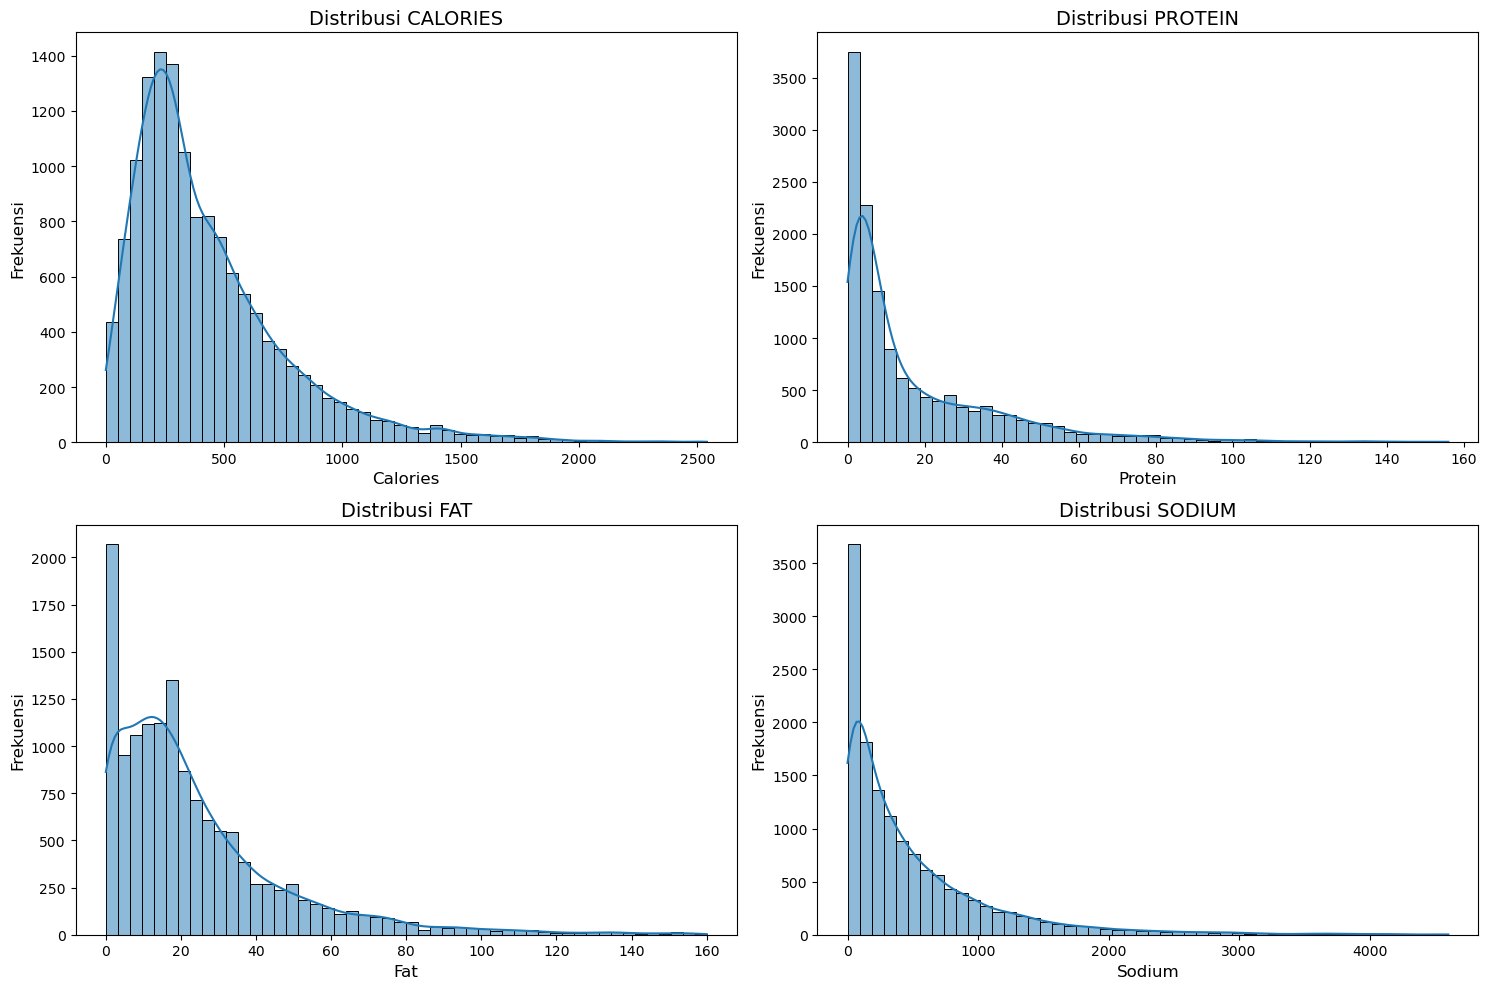

In [395]:
plt.figure(figsize=(15, 10))
df_nutri_cutted = df_numFeature_cleaned[nutri_cols]
for i, col in enumerate(nutri_cols):
    plt.subplot(2, 2, i + 1) # Membuat 4 subplot (2 baris, 2 kolom)
    
    # Menggunakan displot dengan parameter hist_kws untuk batas bin
    sns.histplot(df_nutri_cutted[col], kde=True, bins=50) 
    
    plt.title(f'Distribusi {col.upper()}', fontsize=14)
    plt.xlabel(col.capitalize(), fontsize=12)
    plt.ylabel('Frekuensi', fontsize=12)

plt.tight_layout()
plt.show()

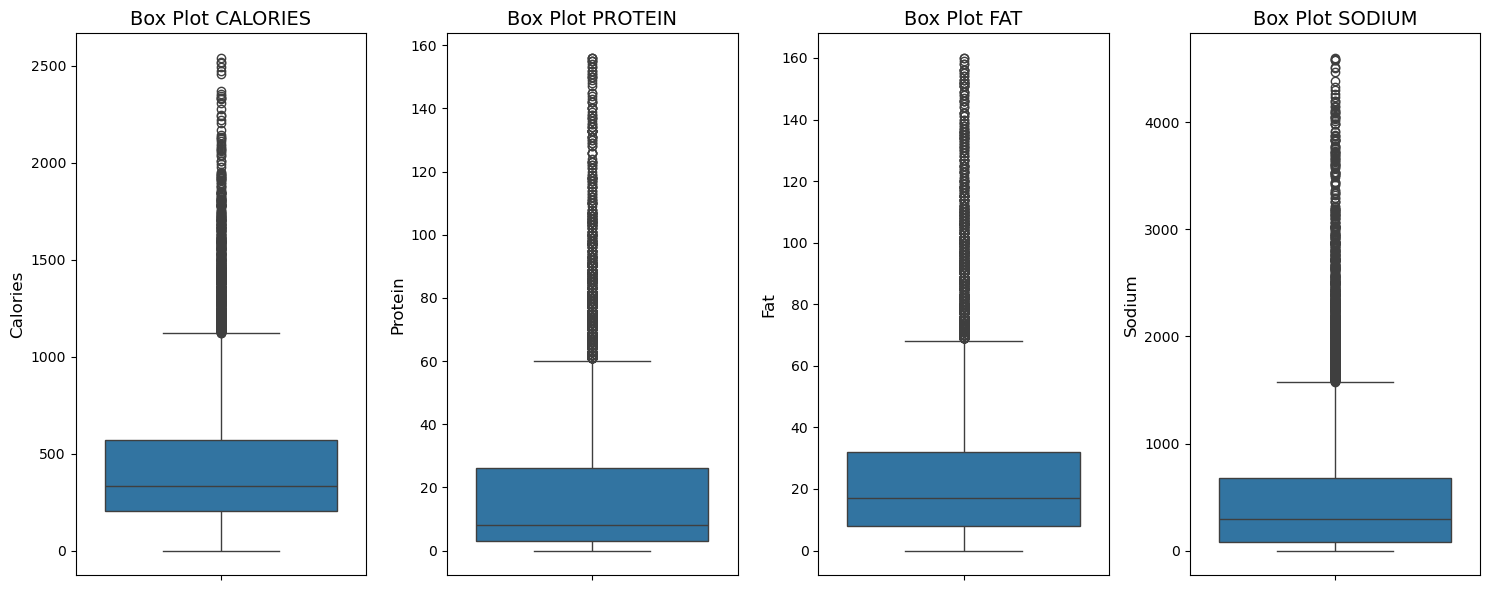

In [396]:
plt.figure(figsize=(15, 6))

for i, col in enumerate(nutri_cols):
    plt.subplot(1, 4, i + 1) # Membuat 4 subplot (1 baris, 4 kolom)
    
    # Menggunakan Box Plot
    sns.boxplot(y=df_nutri_cutted[col]) 
    
    plt.title(f'Box Plot {col.upper()}', fontsize=14)
    plt.ylabel(col.capitalize(), fontsize=12)

plt.tight_layout()
plt.show()

In [397]:
# 3) imputasi missing value dengan median
# Flag apakah row punya semua nutrisi lengkap sebelum imputasi
df_numFeature_cleaned['has_full_nutrition'] = df_numFeature_cleaned[nutri_cols].notna().all(axis=1)

# Imputasi median
df_numFeature_cleaned[nutri_cols] = df_numFeature_cleaned[nutri_cols].fillna(df_numFeature_cleaned[nutri_cols].median())


In [398]:
missingCols = df_numFeature_cleaned.isnull().sum()
missingCols[missingCols> 0]

Series([], dtype: int64)

In [399]:
# 4) Buat supaya pada data nutrisi titlenya uniq karena akan di merge dengan recipes
rating_col = 'rating'  # ganti kalau di dataset namanya beda, misal 'rating_norm', dsb.

def pick_row_for_title(group):
    # kalau kamu mau utamakan yang aslinya lengkap:
    complete = group[group['has_full_nutrition']]
    if len(complete) > 0:
        # ambil yang rating paling tinggi dari yang lengkap
        return complete.loc[complete[rating_col].idxmax()]
    else:
        # tidak ada yang lengkap, ambil yang rating paling tinggi dari semuanya
        return group.loc[group[rating_col].idxmax()]

df_num_cleaned_unique = df_numFeature_cleaned.groupby('title').apply(pick_row_for_title).reset_index(drop=True)

C:\Users\ardik\AppData\Local\Temp\ipykernel_9380\3081915970.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_num_cleaned_unique = df_numFeature_cleaned.groupby('title').apply(pick_row_for_title).reset_index(drop=True)


In [400]:
df_numFeature_cleaned.shape

(13970, 681)

In [401]:
df_num_cleaned_unique.shape

(13590, 681)

In [402]:
df_num_cleaned_unique.columns

Index(['title', 'rating', 'calories', 'protein', 'fat', 'sodium', '#cakeweek',
       '#wasteless', '22-minute meals', '3-ingredient recipes',
       '30 days of groceries', 'advance prep required', 'alabama', 'alaska',
       'alcoholic', 'almond', 'amaretto', 'anchovy', 'anise', 'anniversary',
       'anthony bourdain', 'aperitif', 'appetizer', 'apple', 'apple juice',
       'apricot', 'arizona', 'artichoke', 'arugula', 'asian pear', 'asparagus',
       'aspen', 'atlanta', 'australia', 'avocado', 'back to school',
       'backyard bbq', 'bacon', 'bake', 'banana', 'barley', 'basil', 'bass',
       'bastille day', 'bean', 'beef', 'beef rib', 'beef shank',
       'beef tenderloin', 'beer', 'beet', 'bell pepper', 'berry',
       'beverly hills', 'birthday', 'biscuit', 'bitters', 'blackberry',
       'blender', 'blue cheese', 'blueberry', 'boil', 'bok choy',
       'bon appétit', 'bon app��tit', 'boston', 'bourbon', 'braise', 'bran',
       'brandy', 'bread', 'breadcrumbs', 'breakfast', '

In [403]:
df_num_cleaned_unique['title_lower'] = df_num_cleaned_unique['title'].str.lower().str.strip()

### Merge Dataset

In [404]:
# 1) check matching antara kedua dataset yang dh clean
df_recipes_cleaned['exists_in_num'] = df_recipes_cleaned['title_lower'].isin(df_num_cleaned_unique['title_lower'])
df_num_cleaned_unique['exists_in_recipes'] = df_num_cleaned_unique['title_lower'].isin(df_recipes_cleaned['title_lower'])

df_recipes_cleaned['exists_in_num'].value_counts()
df_num_cleaned_unique['exists_in_recipes'].value_counts()

exists_in_recipes
False    9531
True     4059
Name: count, dtype: int64

In [405]:
# 2) karena kalau hanya 
df_merged = df_recipes_cleaned.merge(
    df_num_cleaned_unique,
    how='left',
    on='title_lower'
)

In [406]:
df_merged = df_merged.drop(columns=['exists_in_num','exists_in_recipes'], inplace=False)

In [407]:
df_merged.shape

(13493, 690)

In [408]:
df_merged.head()

,Title,Ingredients,Instructions,Image_Name,Cleaned_Ingredients,title_lower,Ingredients_Text,ingredients_clean_simple,ingredient_list,title,...,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey,has_full_nutrition
0,Miso-Butter Roast Chicken With Acorn Squash Pa...,"['1 (3½–4-lb.) whole chicken', '2¾ tsp. kosher...","Pat chicken dry with paper towels, season all ...",miso-butter-roast-chicken-acorn-squash-panzanella,"['1 (3½–4-lb.) whole chicken', '2¾ tsp. kosher...",miso-butter roast chicken with acorn squash pa...,"['1 (3½–4-lb.) whole chicken', '2¾ tsp. kosher...",½– lb whole chicken ¾ tsp kosher salt divided ...,"[squash, olive, onion, pepper, wine, bread, pi...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Crispy Salt and Pepper Potatoes,"['2 large egg whites', '1 pound new potatoes (...",Preheat oven to 400°F and line a rimmed baking...,crispy-salt-and-pepper-potatoes-dan-kluger,"['2 large egg whites', '1 pound new potatoes (...",crispy salt and pepper potatoes,"['2 large egg whites', '1 pound new potatoes (...",large egg whites pound new potatoes about inch...,"[tea, pepper, parsley, thyme, egg, potato, ros...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Thanksgiving Mac and Cheese,"['1 cup evaporated milk', '1 cup whole milk', ...",Place a rack in middle of oven; preheat to 400...,thanksgiving-mac-and-cheese-erick-williams,"['1 cup evaporated milk', '1 cup whole milk', ...",thanksgiving mac and cheese,"['1 cup evaporated milk', '1 cup whole milk', ...",cup evaporated milk cup whole milk tsp garlic ...,"[cheese, cheddar, onion, pepper, garlic, papri...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Italian Sausage and Bread Stuffing,"['1 (¾- to 1-pound) round Italian loaf, cut in...",Preheat oven to 350°F with rack in middle. Gen...,italian-sausage-and-bread-stuffing-240559,"['1 (¾- to 1-pound) round Italian loaf, cut in...",italian sausage and bread stuffing,"['1 (¾- to 1-pound) round italian loaf, cut in...",¾ to pound round italian loaf cut into inch cu...,"[turkey, sausage, onion, olive, parsley, egg, ...",Italian Sausage and Bread Stuffing,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
4,Newton's Law,"['1 teaspoon dark brown sugar', '1 teaspoon ho...",Stir together brown sugar and hot water in a c...,newtons-law-apple-bourbon-cocktail,"['1 teaspoon dark brown sugar', '1 teaspoon ho...",newton's law,"['1 teaspoon dark brown sugar', '1 teaspoon ho...",teaspoon dark brown sugar teaspoon hot water ½...,"[lemon, orange, tea, cinnamon, apple]",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [409]:
df_merged.columns

Index(['Title', 'Ingredients', 'Instructions', 'Image_Name',
       'Cleaned_Ingredients', 'title_lower', 'Ingredients_Text',
       'ingredients_clean_simple', 'ingredient_list', 'title', 'rating',
       'calories', 'protein', 'fat', 'sodium', '#cakeweek', '#wasteless',
       '22-minute meals', '3-ingredient recipes', '30 days of groceries',
       'advance prep required', 'alabama', 'alaska', 'alcoholic', 'almond',
       'amaretto', 'anchovy', 'anise', 'anniversary', 'anthony bourdain',
       'aperitif', 'appetizer', 'apple', 'apple juice', 'apricot', 'arizona',
       'artichoke', 'arugula', 'asian pear', 'asparagus', 'aspen', 'atlanta',
       'australia', 'avocado', 'back to school', 'backyard bbq', 'bacon',
       'bake', 'banana', 'barley', 'basil', 'bass', 'bastille day', 'bean',
       'beef', 'beef rib', 'beef shank', 'beef tenderloin', 'beer', 'beet',
       'bell pepper', 'berry', 'beverly hills', 'birthday', 'biscuit',
       'bitters', 'blackberry', 'blender', 'blue c

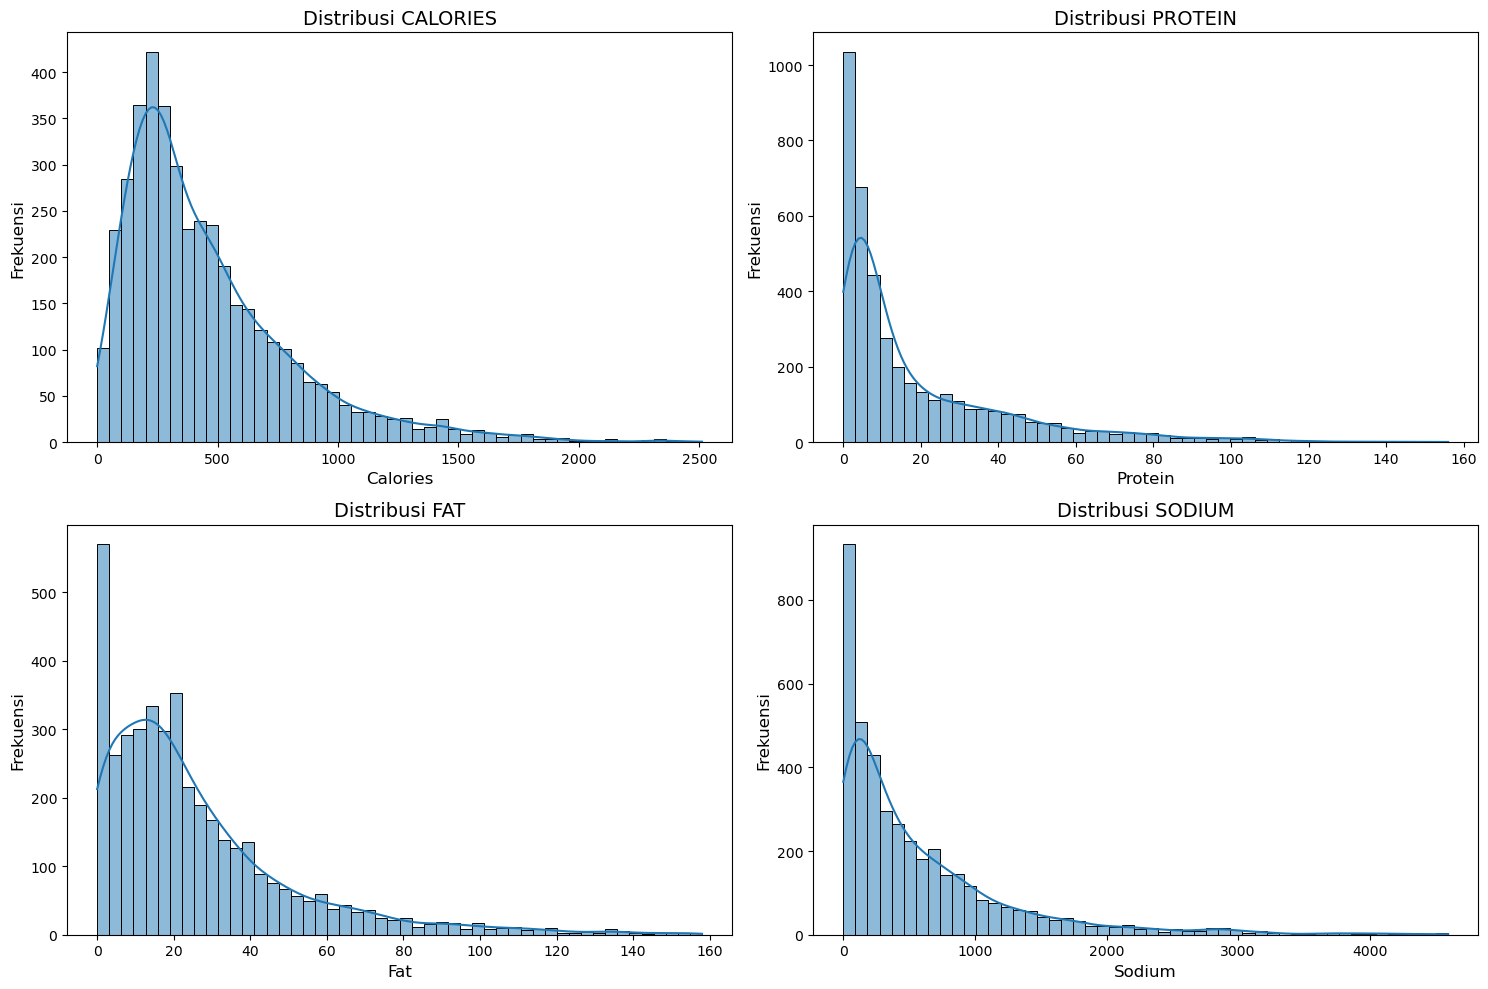

In [410]:
plt.figure(figsize=(15, 10))
df_nutri_cutted = df_merged[nutri_cols]
for i, col in enumerate(nutri_cols):
    plt.subplot(2, 2, i + 1) # Membuat 4 subplot (2 baris, 2 kolom)
    
    # Menggunakan displot dengan parameter hist_kws untuk batas bin
    sns.histplot(df_nutri_cutted[col], kde=True, bins=50) 
    
    plt.title(f'Distribusi {col.upper()}', fontsize=14)
    plt.xlabel(col.capitalize(), fontsize=12)
    plt.ylabel('Frekuensi', fontsize=12)

plt.tight_layout()
plt.show()

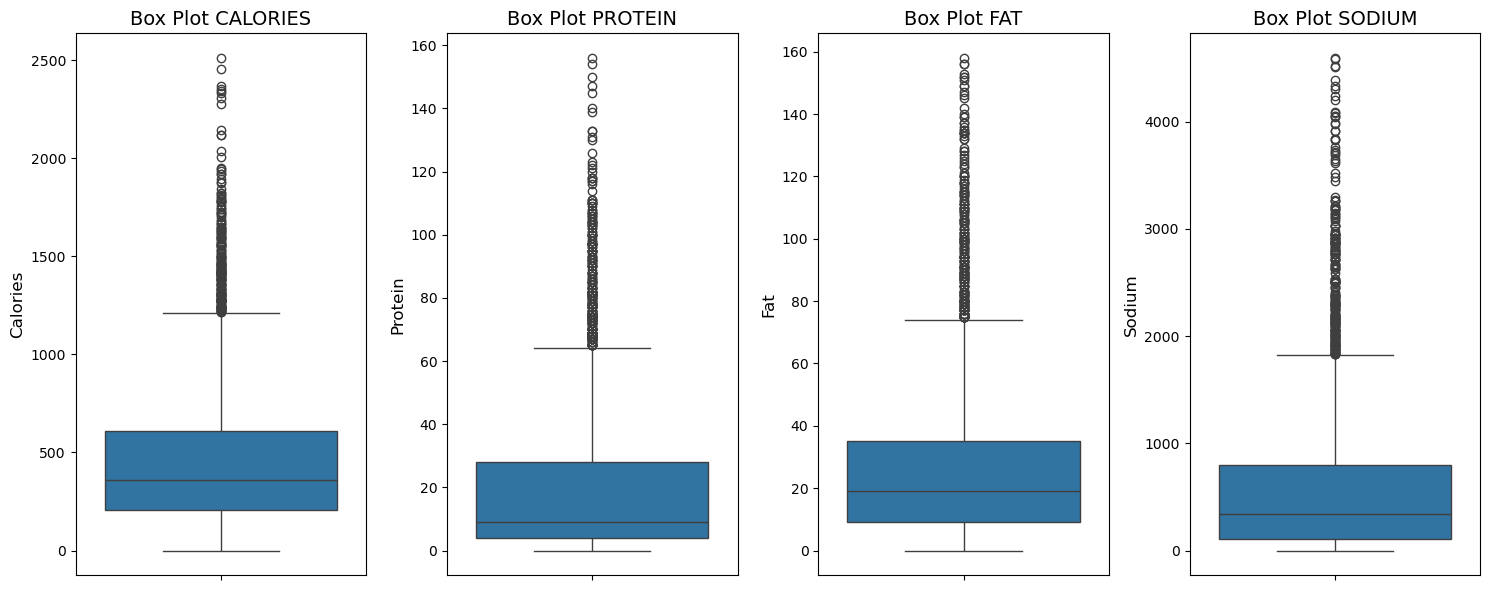

In [411]:
plt.figure(figsize=(15, 6))

for i, col in enumerate(nutri_cols):
    plt.subplot(1, 4, i + 1) # Membuat 4 subplot (1 baris, 4 kolom)
    
    # Menggunakan Box Plot
    sns.boxplot(y=df_nutri_cutted[col]) 
    
    plt.title(f'Box Plot {col.upper()}', fontsize=14)
    plt.ylabel(col.capitalize(), fontsize=12)

plt.tight_layout()
plt.show()

In [412]:
binary_cols = [
    '#cakeweek', '22-minute meals', '3-ingredient recipes', '30 days of groceries', 
    'advance prep required', 'alabama', 'alaska', 'alcoholic', 'almond', 
    'amaretto', 'anchovy', 'anise', 'anniversary', 'anthony bourdain', 
    'aperitif', 'appetizer', 'apple', 'apple juice', 'apricot', 'arizona', 
    'artichoke', 'arugula', 'asian pear', 'asparagus', 'aspen', 'atlanta', 
    'australia', 'avocado', 'back to school', 'backyard bbq', 'bacon', 
    'bake', 'banana', 'barley', 'basil', 'bass', 'bastille day', 'bean', 
    'beef', 'beef rib', 'beef shank', 'beef tenderloin', 'beer', 'beet', 
    'bell pepper', 'berry', 'beverly hills', 'birthday', 'biscuit', 
    'bitters', 'blackberry', 'blender', 'blue cheese', 'blueberry', 'boil', 
    'bok choy', 'bon appétit', 'bon app��tit', 'boston', 'bourbon', 
    'braise', 'bran', 'brandy', 'bread', 'breadcrumbs', 'breakfast', 'brie', 
    'brine', 'brisket', 'broccoli', 'broccoli rabe', 'broil', 'brooklyn', 
    'brown rice', 'brownie', 'brunch', 'brussel sprout', 'buffalo', 
    'buffet', 'bulgaria', 'bulgur', 'burrito', 'butter', 'buttermilk', 
    'butternut squash', 'butterscotch/caramel', 'cabbage', 'cake', 
    'california', 'calvados', 'cambridge', 'campari', 'camping', 'canada', 
    'candy', 'candy thermometer', 'cantaloupe', 'capers', 'caraway', 
    'cardamom', 'carrot', 'cashew', 'casserole/gratin', 'cauliflower', 
    'caviar', 'celery', 'chambord', 'champagne', 'chard', 'chartreuse', 
    'cheddar', 'cheese', 'cherry', 'chestnut', 'chicago', 'chicken', 
    'chickpea', 'chile', 'chile pepper', 'chili', 'chill', 'chive', 
    'chocolate', 'christmas', 'christmas eve', 'cilantro', 'cinco de mayo', 
    'cinnamon', 'citrus', 'clam', 'clove', 'cobbler/crumble', 'cocktail', 
    'cocktail party', 'coconut', 'cod', 'coffee', 'coffee grinder', 
    'cognac/armagnac', 'collard greens', 'colorado', 'columbus', 
    'condiment', 'condiment/spread', 'connecticut', 'cook like a diner', 
    'cookbook critic', 'cookie', 'cookies', 'coriander', 'corn', 'cornmeal', 
    'costa mesa', 'cottage cheese', 'couscous', 'crab', 'cranberry', 
    'cranberry sauce', 'cream cheese', 'créme de cacao', 'crêpe', 
    'cr��me de cacao', 'cuba', 'cucumber', 'cumin', 'cupcake', 'currant', 
    'curry', 'custard', 'dairy', 'dairy free', 'dallas', 'date', 'deep-fry', 
    'denver', 'dessert', 'digestif', 'dill', 'dinner', 'dip', 'diwali', 
    'dominican republic', 'dorie greenspan', 'double boiler', 'dried fruit', 
    'drink', 'drinks', 'duck', 'easter', 'eau de vie', 'edible gift', 'egg', 
    'egg nog', 'eggplant', 'egypt', 'emeril lagasse', 'endive', 
    'engagement party', 'england', 'entertaining', 'epi + ushg', 
    'epi loves the microwave', 'escarole', 'fall', 'family reunion', 
    'fat free', 'father\'s day', 'fennel', 'feta', 'fig', 'fish', 
    'flaming hot summer', 'flat bread', 'florida', 'fontina', 
    'food processor', 'fortified wine', 'fourth of july', 'france', 
    'frangelico', 'frankenrecipe', 'freeze/chill', 'freezer food', 
    'friendsgiving', 'frittata', 'fritter', 'frozen dessert', 'fruit', 
    'fruit juice', 'fry', 'game', 'garlic', 'georgia', 'germany', 'gin', 
    'ginger', 'goat cheese', 'goose', 'gouda', 'gourmet', 'graduation', 
    'grains', 'grand marnier', 'granola', 'grape', 'grapefruit', 'grappa', 
    'green bean', 'green onion/scallion', 'grill', 'grill/barbecue', 
    'ground beef', 'ground lamb', 'guam', 'guava', 'haiti', 'halibut', 
    'halloween', 'ham', 'hamburger', 'hanukkah', 'harpercollins', 'hawaii', 
    'hazelnut', 'healdsburg', 'healthy', 'herb', 'high fiber', 'hollywood', 
    'hominy/cornmeal/masa', 'honey', 'honeydew', 'hors d\'oeuvre', 
    'horseradish', 'hot drink', 'hot pepper', 'house & garden', 
    'house cocktail', 'houston', 'hummus', 'ice cream', 'ice cream machine', 
    'iced coffee', 'iced tea', 'idaho', 'illinois', 'indiana', 'iowa', 
    'ireland', 'israel', 'italy', 'jalapeño', 'jam or jelly', 'jamaica', 
    'japan', 'jerusalem artichoke', 'juicer', 'jícama', 'kahlúa', 'kale', 
    'kansas', 'kansas city', 'kentucky', 'kentucky derby', 'kid-friendly', 
    'kidney friendly', 'kirsch', 'kitchen olympics', 'kiwi', 'kosher', 
    'kosher for passover', 'kumquat', 'kwanzaa', 'labor day', 'lamb', 
    'lamb chop', 'lamb shank', 'lancaster', 'las vegas', 'lasagna', 
    'leafy green', 'leek', 'legume', 'lemon', 'lemon juice', 'lemongrass', 
    'lentil', 'lettuce', 'lima bean', 'lime', 'lime juice', 'lingonberry', 
    'liqueur', 'lobster', 'london', 'long beach', 'los angeles', 
    'louisiana', 'louisville', 'low cal', 'low carb', 'low cholesterol', 
    'low fat', 'low sodium', 'low sugar', 'low/no sugar', 'lunar new year', 
    'lunch', 'lychee', 'macadamia nut', 'macaroni and cheese', 'maine', 
    'mandoline', 'mango', 'maple syrup', 'mardi gras', 'margarita', 
    'marinade', 'marinate', 'marsala', 'marscarpone', 'marshmallow', 
    'martini', 'maryland', 'massachusetts', 'mayonnaise', 'meat', 
    'meatball', 'meatloaf', 'melon', 'mexico', 'mezcal', 'miami', 
    'michigan', 'microwave', 'midori', 'milk/cream', 'minneapolis', 
    'minnesota', 'mint', 'mississippi', 'missouri', 'mixer', 'molasses', 
    'monterey jack', 'mortar and pestle', 'mother\'s day', 'mozzarella', 
    'muffin', 'mushroom', 'mussel', 'mustard', 'mustard greens', 
    'nancy silverton', 'nebraska', 'nectarine', 'new hampshire', 
    'new jersey', 'new mexico', 'new orleans', 'new year\'s day', 
    'new year\'s eve', 'new york', 'no meat, no problem', 'no sugar added', 
    'no-cook', 'non-alcoholic', 'noodle', 'north carolina', 'nut', 'nutmeg', 
    'oat', 'oatmeal', 'octopus', 'ohio', 'oklahoma', 'okra', 'oktoberfest', 
    'olive', 'omelet', 'one-pot meal', 'onion', 'orange', 'orange juice', 
    'oregano', 'oregon', 'organic', 'orzo', 'oscars', 'oyster', 
    'pacific palisades', 'paleo', 'pan-fry', 'pancake', 'papaya', 'paprika', 
    'parade', 'paris', 'parmesan', 'parsley', 'parsnip', 'party', 
    'pasadena', 'passion fruit', 'passover', 'pasta', 'pasta maker', 
    'pastry', 'pea', 'peach', 'peanut', 'peanut butter', 'peanut free', 
    'pear', 'pecan', 'pennsylvania', 'pepper', 'pernod', 'persian new year', 
    'persimmon', 'peru', 'pescatarian', 'philippines', 
    'phyllo/puff pastry dough', 'pickles', 'picnic', 'pie', 'pine nut', 
    'pineapple', 'pistachio', 'pittsburgh', 'pizza', 'plantain', 'plum', 
    'poach', 'poblano', 'poker/game night', 'pomegranate', 
    'pomegranate juice', 'poppy', 'pork', 'pork chop', 'pork rib', 
    'pork tenderloin', 'port', 'portland', 'pot pie', 'potato', 
    'potato salad', 'potluck', 'poultry', 'poultry sausage', 
    'pressure cooker', 'prosciutto', 'providence', 'prune', 'pumpkin', 
    'punch', 'purim', 'quail', 'quiche', 'quick & easy', 
    'quick and healthy', 'quince', 'quinoa', 'rabbit', 'rack of lamb', 
    'radicchio', 'radish', 'raisin', 'ramadan', 'ramekin', 'raspberry', 
    'raw', 'red wine', 'rhode island', 'rhubarb', 'rice', 'ricotta', 
    'roast', 'root vegetable', 'rosemary', 'rosh hashanah/yom kippur', 
    'rosé', 'rub', 'rum', 'rutabaga', 'rye', 'saffron', 'sage', 'sake', 
    'salad', 'salad dressing', 'salmon', 'salsa', 'san francisco', 
    'sandwich', 'sandwich theory', 'sangria', 'santa monica', 'sardine', 
    'sauce', 'sausage', 'sauté', 'scallop', 'scotch', 'seafood', 'seattle', 
    'seed', 'self', 'semolina', 'sesame', 'sesame oil', 'shallot', 
    'shavuot', 'shellfish', 'sherry', 'shower', 'shrimp', 'side', 'simmer', 
    'skewer', 'slow cooker', 'smoker', 'smoothie', 'snapper', 'sorbet', 
    'soufflé/meringue', 'soup/stew', 'sour cream', 'sourdough', 
    'south carolina', 'soy', 'soy free', 'soy sauce', 'spain', 
    'sparkling wine', 'spice', 'spinach', 'spirit', 'spring', 'spritzer', 
    'squash', 'squid', 'st. louis', 'st. patrick\'s day', 'steak', 'steam', 
    'stew', 'stir-fry', 'stock', 'strawberry', 'stuffing/dressing', 
    'sugar conscious', 'sugar snap pea', 'sukkot', 'summer', 'super bowl', 
    'suzanne goin', 'sweet potato/yam', 'swiss cheese', 'switzerland', 
    'swordfish', 'taco', 'tailgating', 'tamarind', 'tangerine', 'tapioca', 
    'tarragon', 'tart', 'tea', 'tennessee', 'tequila', 'tested & improved', 
    'texas', 'thanksgiving', 'thyme', 'tilapia', 'tofu', 'tomatillo', 
    'tomato', 'tortillas', 'tree nut', 'tree nut free', 'triple sec', 
    'tropical fruit', 'trout', 'tuna', 'turnip', 'utah', 'valentine\'s day', 
    'vanilla', 'veal', 'vegan', 'vegetable', 'vegetarian', 'venison', 
    'vermont', 'vermouth', 'vinegar', 'virginia', 'vodka', 'waffle', 
    'walnut', 'wasabi', 'washington', 'washington, d.c.', 'watercress', 
    'watermelon', 'wedding', 'weelicious', 'west virginia', 'westwood', 
    'wheat/gluten-free', 'whiskey', 'white wine', 'whole wheat', 
    'wild rice', 'windsor', 'wine', 'winter', 'wisconsin', 'wok', 
    'yellow squash', 'yogurt', 'yonkers', 'yuca', 'zucchini', 'cookbooks', 
    'leftovers', 'snack', 'snack week', 'turkey', '#wasteless'
]

## Feature Engginering

In [413]:
"""
Melakukan penyaringan feature yang sesuai dimana sesuai dengan kriteria sebagai beriut ini :
Nutrition : 
- calories
- protein
- fat
- sodium

Allergens :
1 dairy
2 eggs
3 fish
4 shellfish
5 soy
6 sesame
7 wheat
8 peanuts
9 tree nuts

Dietary Preference :
1. Halal
2. Lactose Intolerance
3. Low Carb
4. Weight Loss
5. Gluten-Free
6. Dairy-Free
7. Spicy
8. No Fried Food

Keterangan :
Halal
Makanan yang diproses dan disiapkan sesuai aturan Islam (tidak mengandung babi, alkohol, dan harus disembelih secara halal).

Lactose Intolerance
Tidak bisa mencerna laktosa, sehingga harus menghindari susu sapi dan produk berbahan susu yang ada laktosa (seperti keju atau yogurt biasa).

Keto / Low Carb
Pola makan yang sangat rendah karbohidrat dan tinggi lemak untuk membantu tubuh membakar lemak sebagai energi.

Weight Loss
Preferensi makanan rendah kalori, rendah gula, atau rendah lemak untuk membantu menurunkan berat badan.

High Protein
Fokus pada makanan tinggi protein seperti ayam, ikan, telur, tahu, dan kacang untuk membantu energi, kenyang lebih lama, atau membangun otot.

Gluten-Free
Menghindari gluten (protein dalam gandum, barley, rye) karena alergi, sensitivitas, atau gangguan pencernaan.

Dairy-Free
Menghindari semua produk susu (baik ada laktosa atau tidak) seperti susu, keju, mentega, yogurt — baik karena alergi maupun preferensi.

Spicy
Menyukai makanan pedas atau berbumbu kuat.

No Fried Food
Menghindari makanan yang digoreng untuk alasan kesehatan atau preferensi rasa (misalnya memilih panggang, kukus, atau rebus).
"""

'\nMelakukan penyaringan feature yang sesuai dimana sesuai dengan kriteria sebagai beriut ini :\nNutrition : \n- calories\n- protein\n- fat\n- sodium\n\nAllergens :\n1 dairy\n2 eggs\n3 fish\n4 shellfish\n5 soy\n6 sesame\n7 wheat\n8 peanuts\n9 tree nuts\n\nDietary Preference :\n1. Halal\n2. Lactose Intolerance\n3. Low Carb\n4. Weight Loss\n5. Gluten-Free\n6. Dairy-Free\n7. Spicy\n8. No Fried Food\n\nKeterangan :\nHalal\nMakanan yang diproses dan disiapkan sesuai aturan Islam (tidak mengandung babi, alkohol, dan harus disembelih secara halal).\n\nLactose Intolerance\nTidak bisa mencerna laktosa, sehingga harus menghindari susu sapi dan produk berbahan susu yang ada laktosa (seperti keju atau yogurt biasa).\n\nKeto / Low Carb\nPola makan yang sangat rendah karbohidrat dan tinggi lemak untuk membantu tubuh membakar lemak sebagai energi.\n\nWeight Loss\nPreferensi makanan rendah kalori, rendah gula, atau rendah lemak untuk membantu menurunkan berat badan.\n\nHigh Protein\nFokus pada makanan

In [414]:
# =========================================================
# 1) SAFE FUNCTIONS (sangat penting agar NaN tidak dianggap 0)
# =========================================================

def safe_or(series):
    """
    Return:
      1 -> if ANY value == 1
      0 -> if ALL values == 0
      NaN -> if ALL values NaN (unknown)
    """
    if series.isna().all():          
        return np.nan
    return int(series.fillna(0).max())


def safe_and(series):
    """
    Return:
      1 -> if ALL values == 0 (aman)
      0 -> if ANY value == 1 (mengandung)
      NaN -> jika semua bukan 1 tetapi ada NaN (unknown)
    """
    if 1 in series.values:
        return 0
    if series.isna().any():
        return np.nan
    return 1


def safe_not(series):
    """
    Return:
      1 -> if NONE are 1
      0 -> if ANY are 1
      NaN -> all NaN
    """
    if series.isna().all():
        return np.nan
    return int(series.fillna(0).max() == 0)


# =========================================================
# 2) --- ALLERGEN FEATURES ---
# =========================================================

# Dairy
dairy_cols = [
    "milk/cream","butter","buttermilk","yogurt","sour cream","ice cream",
    "cottage cheese","cream cheese","ricotta","marscarpone","cheese",
    "cheddar","brie","feta","fontina","goat cheese","gouda","monterey jack",
    "mozzarella","parmesan","swiss cheese","blue cheese","egg nog"
]
df_merged["dairy"] = df_merged[dairy_cols].apply(safe_or, axis=1)

# Egg  
df_merged["egg"] = df_merged["egg"]

# Fish
fish_cols = ["fish","salmon","tuna","trout"]
df_merged["fish"] = df_merged[fish_cols].apply(safe_or, axis=1)

# Shellfish
shellfish_cols = ["shellfish","shrimp","oyster","crab","scallop"]
df_merged["shellfish"] = df_merged[shellfish_cols].apply(safe_or, axis=1)

# Soy
soy_cols = ["soy","soy sauce"]
df_merged["soy"] = df_merged[soy_cols].apply(safe_or, axis=1)

# Sesame
df_merged["sesame"] = df_merged["sesame"]

# Whole Wheat / Gluten Source
df_merged["whole_wheat"] = df_merged[["whole wheat"]].apply(safe_or, axis=1)

# Peanut
df_merged["peanut"] = df_merged["peanut"]

# Tree Nut
tree_nut_cols = ["almond","walnut","pecan"]
df_merged["tree_nut"] = df_merged[tree_nut_cols].apply(safe_or, axis=1)


# =========================================================
# 3) --- DIETARY PREFERENCES ---
# =========================================================

# -----------------------------
# HALAL
# -----------------------------
haram_cols = [
    "pork","pork chop","pork rib","pork tenderloin","bacon","ham",
    "prosciutto","sausage",
    "alcoholic","beer","wine","white wine","red wine",
    "sparkling wine","champagne","spirit","whiskey","vodka",
    "rum","gin","bourbon","scotch","tequila","mezcal","liqueur",
    "fortified wine","brandy","cognac/armagnac","marsala",
    "vermouth","sherry","port","kirsch"
]
df_merged["halal"] = df_merged[haram_cols].apply(safe_and, axis=1)


# -----------------------------
# LACTOSE FREE
# -----------------------------
df_merged["is_lactose_free"] = df_merged[dairy_cols].apply(safe_and, axis=1)


# -----------------------------
# LOW CARB (ambil dari dataset!)
# -----------------------------
# cek dulu nama kolomnya (biasanya "low carb")
for col in df_merged.columns:
    if "carb" in col.lower():
        print("Detected low carb column:", col)

df_merged["low_carb"] = df_merged["low carb"]  # sesuaikan jika berbeda


# -----------------------------
# WEIGHT LOSS
# -----------------------------
weight_cols = ["healthy","low cal","low fat","low sugar","low/no sugar","fat free","high fiber"]
df_merged["weight_loss"] = df_merged[weight_cols].apply(safe_or, axis=1)


# -----------------------------
# HIGH PROTEIN
# (pakai median asli sebelum scaling)
# -----------------------------
protein_median = df_merged["protein"].median()
df_merged["high_protein"] = (df_merged["protein"] > protein_median).astype(int)


# -----------------------------
# GLUTEN FREE
# -----------------------------
df_merged["gluten_free"] = df_merged["wheat/gluten-free"]


# -----------------------------
# DAIRY FREE
# -----------------------------
df_merged["dairy_free"] = df_merged[dairy_cols].apply(safe_and, axis=1)


# -----------------------------
# IS SPICY
# -----------------------------
spicy_cols = [
    "chile","chile pepper","chili","jalapeño","poblano",
    "hot pepper","ginger","wasabi","curry","mustard"
]
df_merged["is_spicy"] = df_merged[spicy_cols].apply(safe_or, axis=1)


# -----------------------------
# NOT FRIED
# -----------------------------
fried_cols = ["fry","deep-fry","pan-fry","fritter"]
df_merged["is_not_fried"] = df_merged[fried_cols].apply(safe_and, axis=1)


print("All allergen & dietary preference features generated successfully!")


Detected low carb column: low carb
All allergen & dietary preference features generated successfully!


In [415]:
df_merged.head()

,Title,Ingredients,Instructions,Image_Name,Cleaned_Ingredients,title_lower,Ingredients_Text,ingredients_clean_simple,ingredient_list,title,...,tree_nut,halal,is_lactose_free,low_carb,weight_loss,high_protein,gluten_free,dairy_free,is_spicy,is_not_fried
0,Miso-Butter Roast Chicken With Acorn Squash Pa...,"['1 (3½–4-lb.) whole chicken', '2¾ tsp. kosher...","Pat chicken dry with paper towels, season all ...",miso-butter-roast-chicken-acorn-squash-panzanella,"['1 (3½–4-lb.) whole chicken', '2¾ tsp. kosher...",miso-butter roast chicken with acorn squash pa...,"['1 (3½–4-lb.) whole chicken', '2¾ tsp. kosher...",½– lb whole chicken ¾ tsp kosher salt divided ...,"[squash, olive, onion, pepper, wine, bread, pi...",NaN,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
1,Crispy Salt and Pepper Potatoes,"['2 large egg whites', '1 pound new potatoes (...",Preheat oven to 400°F and line a rimmed baking...,crispy-salt-and-pepper-potatoes-dan-kluger,"['2 large egg whites', '1 pound new potatoes (...",crispy salt and pepper potatoes,"['2 large egg whites', '1 pound new potatoes (...",large egg whites pound new potatoes about inch...,"[tea, pepper, parsley, thyme, egg, potato, ros...",NaN,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
2,Thanksgiving Mac and Cheese,"['1 cup evaporated milk', '1 cup whole milk', ...",Place a rack in middle of oven; preheat to 400...,thanksgiving-mac-and-cheese-erick-williams,"['1 cup evaporated milk', '1 cup whole milk', ...",thanksgiving mac and cheese,"['1 cup evaporated milk', '1 cup whole milk', ...",cup evaporated milk cup whole milk tsp garlic ...,"[cheese, cheddar, onion, pepper, garlic, papri...",NaN,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
3,Italian Sausage and Bread Stuffing,"['1 (¾- to 1-pound) round Italian loaf, cut in...",Preheat oven to 350°F with rack in middle. Gen...,italian-sausage-and-bread-stuffing-240559,"['1 (¾- to 1-pound) round Italian loaf, cut in...",italian sausage and bread stuffing,"['1 (¾- to 1-pound) round italian loaf, cut in...",¾ to pound round italian loaf cut into inch cu...,"[turkey, sausage, onion, olive, parsley, egg, ...",Italian Sausage and Bread Stuffing,...,0.0,0.0,1.0,0.0,0.0,1,0.0,1.0,0.0,1.0
4,Newton's Law,"['1 teaspoon dark brown sugar', '1 teaspoon ho...",Stir together brown sugar and hot water in a c...,newtons-law-apple-bourbon-cocktail,"['1 teaspoon dark brown sugar', '1 teaspoon ho...",newton's law,"['1 teaspoon dark brown sugar', '1 teaspoon ho...",teaspoon dark brown sugar teaspoon hot water ½...,"[lemon, orange, tea, cinnamon, apple]",NaN,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN


In [416]:
# list semua fitur yang mungkin punya NaN
diet_prefs = [
    "halal", "is_lactose_free", "low_carb", "weight_loss", 
    "high_protein", "gluten_free", "dairy_free",
    "is_spicy", "is_not_fried"
]

allergen_cols = [
    "dairy","egg","fish","shellfish","soy","sesame",
    "whole_wheat","peanut","tree_nut"
]

# Gabungkan
fe_cols = diet_prefs + allergen_cols

# Tambahkan flag unknown + isi NaN menjadi 0
for col in fe_cols:
    df_merged[col+"_unknown"] = df_merged[col].isna().astype(int)
    df_merged[col] = df_merged[col].fillna(0)

In [417]:
df_merged[nutri_cols] = df_merged[nutri_cols].fillna(df_merged[nutri_cols].median())
df_merged[binary_cols] = df_merged[binary_cols].fillna(0)
df_merged = df_merged.drop(columns=['title'])
df_merged['rating_missing'] = df_merged['rating'].isna().astype(int)
df_merged['rating'] = df_merged['rating'].fillna(df_merged['rating'].median())
df_merged['has_full_nutrition'] = df_merged['has_full_nutrition'].fillna(False)

C:\Users\ardik\AppData\Local\Temp\ipykernel_9380\506636702.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_merged['rating_missing'] = df_merged['rating'].isna().astype(int)
C:\Users\ardik\AppData\Local\Temp\ipykernel_9380\506636702.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_merged['has_full_nutrition'] = df_merged['has_full_nutrition'].fillna(False)


In [418]:
miss = df_merged.isnull().sum()
miss[miss > 0]

Series([], dtype: int64)

In [419]:
df_merged.head()

,Title,Ingredients,Instructions,Image_Name,Cleaned_Ingredients,title_lower,Ingredients_Text,ingredients_clean_simple,ingredient_list,rating,...,dairy_unknown,egg_unknown,fish_unknown,shellfish_unknown,soy_unknown,sesame_unknown,whole_wheat_unknown,peanut_unknown,tree_nut_unknown,rating_missing
0,Miso-Butter Roast Chicken With Acorn Squash Pa...,"['1 (3½–4-lb.) whole chicken', '2¾ tsp. kosher...","Pat chicken dry with paper towels, season all ...",miso-butter-roast-chicken-acorn-squash-panzanella,"['1 (3½–4-lb.) whole chicken', '2¾ tsp. kosher...",miso-butter roast chicken with acorn squash pa...,"['1 (3½–4-lb.) whole chicken', '2¾ tsp. kosher...",½– lb whole chicken ¾ tsp kosher salt divided ...,"[squash, olive, onion, pepper, wine, bread, pi...",4.375,...,1,1,1,1,1,1,1,1,1,1
1,Crispy Salt and Pepper Potatoes,"['2 large egg whites', '1 pound new potatoes (...",Preheat oven to 400°F and line a rimmed baking...,crispy-salt-and-pepper-potatoes-dan-kluger,"['2 large egg whites', '1 pound new potatoes (...",crispy salt and pepper potatoes,"['2 large egg whites', '1 pound new potatoes (...",large egg whites pound new potatoes about inch...,"[tea, pepper, parsley, thyme, egg, potato, ros...",4.375,...,1,1,1,1,1,1,1,1,1,1
2,Thanksgiving Mac and Cheese,"['1 cup evaporated milk', '1 cup whole milk', ...",Place a rack in middle of oven; preheat to 400...,thanksgiving-mac-and-cheese-erick-williams,"['1 cup evaporated milk', '1 cup whole milk', ...",thanksgiving mac and cheese,"['1 cup evaporated milk', '1 cup whole milk', ...",cup evaporated milk cup whole milk tsp garlic ...,"[cheese, cheddar, onion, pepper, garlic, papri...",4.375,...,1,1,1,1,1,1,1,1,1,1
3,Italian Sausage and Bread Stuffing,"['1 (¾- to 1-pound) round Italian loaf, cut in...",Preheat oven to 350°F with rack in middle. Gen...,italian-sausage-and-bread-stuffing-240559,"['1 (¾- to 1-pound) round Italian loaf, cut in...",italian sausage and bread stuffing,"['1 (¾- to 1-pound) round italian loaf, cut in...",¾ to pound round italian loaf cut into inch cu...,"[turkey, sausage, onion, olive, parsley, egg, ...",5.000,...,0,0,0,0,0,0,0,0,0,0
4,Newton's Law,"['1 teaspoon dark brown sugar', '1 teaspoon ho...",Stir together brown sugar and hot water in a c...,newtons-law-apple-bourbon-cocktail,"['1 teaspoon dark brown sugar', '1 teaspoon ho...",newton's law,"['1 teaspoon dark brown sugar', '1 teaspoon ho...",teaspoon dark brown sugar teaspoon hot water ½...,"[lemon, orange, tea, cinnamon, apple]",4.375,...,1,1,1,1,1,1,1,1,1,1


In [423]:
df_merged.columns

Index(['Title', 'Ingredients', 'Instructions', 'Image_Name',
       'Cleaned_Ingredients', 'title_lower', 'Ingredients_Text',
       'ingredients_clean_simple', 'ingredient_list', 'rating', 'calories',
       'protein', 'fat', 'sodium', '#cakeweek', '#wasteless',
       '22-minute meals', '3-ingredient recipes', '30 days of groceries',
       'advance prep required', 'alabama', 'alaska', 'alcoholic', 'almond',
       'amaretto', 'anchovy', 'anise', 'anniversary', 'anthony bourdain',
       'aperitif', 'appetizer', 'apple', 'apple juice', 'apricot', 'arizona',
       'artichoke', 'arugula', 'asian pear', 'asparagus', 'aspen', 'atlanta',
       'australia', 'avocado', 'back to school', 'backyard bbq', 'bacon',
       'bake', 'banana', 'barley', 'basil', 'bass', 'bastille day', 'bean',
       'beef', 'beef rib', 'beef shank', 'beef tenderloin', 'beer', 'beet',
       'bell pepper', 'berry', 'beverly hills', 'birthday', 'biscuit',
       'bitters', 'blackberry', 'blender', 'blue cheese', '

In [425]:
# Rekap semua fitur yang akan dipakai

print(nutri_cols)
print(binary_cols)
print(allergen_cols)
print(diet_prefs)
unknown_flag = ['halal_unknown', 'is_lactose_free_unknown',
       'low_carb_unknown', 'weight_loss_unknown', 'high_protein_unknown',
       'gluten_free_unknown', 'dairy_free_unknown', 'is_spicy_unknown',
       'is_not_fried_unknown', 'dairy_unknown', 'egg_unknown', 'fish_unknown',
       'shellfish_unknown', 'soy_unknown', 'sesame_unknown',
       'whole_wheat_unknown', 'peanut_unknown', 'tree_nut_unknown',
       'rating_missing']
print(unknown_flag)

# fitur text
df_merged['text_all'] =(
    df_merged['Title'].astype(str) + " " +
    df_merged['ingredients_clean_simple'].astype(str) + " " +
    df_merged['Instructions'].astype(str)
)

['calories', 'protein', 'fat', 'sodium']
['#cakeweek', '22-minute meals', '3-ingredient recipes', '30 days of groceries', 'advance prep required', 'alabama', 'alaska', 'alcoholic', 'almond', 'amaretto', 'anchovy', 'anise', 'anniversary', 'anthony bourdain', 'aperitif', 'appetizer', 'apple', 'apple juice', 'apricot', 'arizona', 'artichoke', 'arugula', 'asian pear', 'asparagus', 'aspen', 'atlanta', 'australia', 'avocado', 'back to school', 'backyard bbq', 'bacon', 'bake', 'banana', 'barley', 'basil', 'bass', 'bastille day', 'bean', 'beef', 'beef rib', 'beef shank', 'beef tenderloin', 'beer', 'beet', 'bell pepper', 'berry', 'beverly hills', 'birthday', 'biscuit', 'bitters', 'blackberry', 'blender', 'blue cheese', 'blueberry', 'boil', 'bok choy', 'bon appétit', 'bon app��tit', 'boston', 'bourbon', 'braise', 'bran', 'brandy', 'bread', 'breadcrumbs', 'breakfast', 'brie', 'brine', 'brisket', 'broccoli', 'broccoli rabe', 'broil', 'brooklyn', 'brown rice', 'brownie', 'brunch', 'brussel sprout',

C:\Users\ardik\AppData\Local\Temp\ipykernel_9380\352344967.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_merged['text_all'] =(


In [426]:
df_merged.describe()

,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,...,dairy_unknown,egg_unknown,fish_unknown,shellfish_unknown,soy_unknown,sesame_unknown,whole_wheat_unknown,peanut_unknown,tree_nut_unknown,rating_missing
count,13493.000000,13493.000000,13493.000000,13493.000000,13493.000000,13493.000000,13493.000000,13493.000000,13493.000000,13493.000000,...,13493.000000,13493.000000,13493.000000,13493.000000,13493.000000,13493.000000,13493.000000,13493.000000,13493.000000,13493.000000
mean,4.192591,388.547543,12.207811,21.182169,414.826280,0.000296,0.000074,0.001038,0.001482,0.000519,...,0.689913,0.689913,0.689913,0.689913,0.689913,0.689913,0.689913,0.689913,0.689913,0.689913
std,0.851801,204.383043,14.038196,14.575051,396.660714,0.017216,0.008609,0.032196,0.038473,0.022772,...,0.462546,0.462546,0.462546,0.462546,0.462546,0.462546,0.462546,0.462546,0.462546,0.462546
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.375000,357.000000,9.000000,19.000000,341.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.375000,357.000000,9.000000,19.000000,341.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,4.375000,357.000000,9.000000,19.000000,341.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,5.000000,2511.000000,156.000000,158.000000,4595.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Data Transformation

#### Scalling data

In [489]:
# scaler = StandardScaler()
scaler = RobustScaler()
# scaler = MinMaxScaler()
df_merged[nutri_cols] = scaler.fit_transform(df_merged[nutri_cols])

#### Vectorization Text (TF-IDF)

In [490]:
tfidf = TfidfVectorizer(
    max_features=3000,       # cukup besar
    ngram_range=(1,2),       # bigram lebih kaya makna
    min_df=3,                # filter kata yang sangat jarang
    stop_words='english'
)

X_text = tfidf.fit_transform(df_merged['text_all']).toarray()

In [491]:
# Turunkan Dimensi TF-IDF dengan Truncated SVD
svd = TruncatedSVD(n_components=100, random_state=42)
X_text_svd = svd.fit_transform(X_text)   # X_text = hasil tfidf.toarray()

In [492]:
X_nut = df_merged[nutri_cols].values * 3.0
X_bin = df_merged[binary_cols].values * 1.0
X_allergen = df_merged[allergen_cols].values * 1.5
X_diet = df_merged[diet_prefs].values * 1.5
X_unk = df_merged[unknown_flag].values * 1.0
X_text = X_text_svd * 2.0

In [508]:
# X_food = np.hstack([
#     df_merged[nutri_cols].values,
#     df_merged[binary_cols].values,
#     df_merged[allergen_cols].values,
#     df_merged[diet_prefs].values,
#     df_merged[unknown_flag].values,
#     X_text
# ])

X_food = np.hstack([
    X_nut,
    X_bin,
    X_allergen,
    X_diet,
    X_unk,
    X_text
])

## Training

### Menentukan K-Value

Training KMeans for k=5...
  Silhouette Score: 0.5759
Training KMeans for k=10...
  Silhouette Score: 0.5769
Training KMeans for k=15...
  Silhouette Score: 0.5684
Training KMeans for k=20...
  Silhouette Score: 0.0726
Training KMeans for k=25...
  Silhouette Score: 0.5621
Training KMeans for k=30...
  Silhouette Score: 0.0689


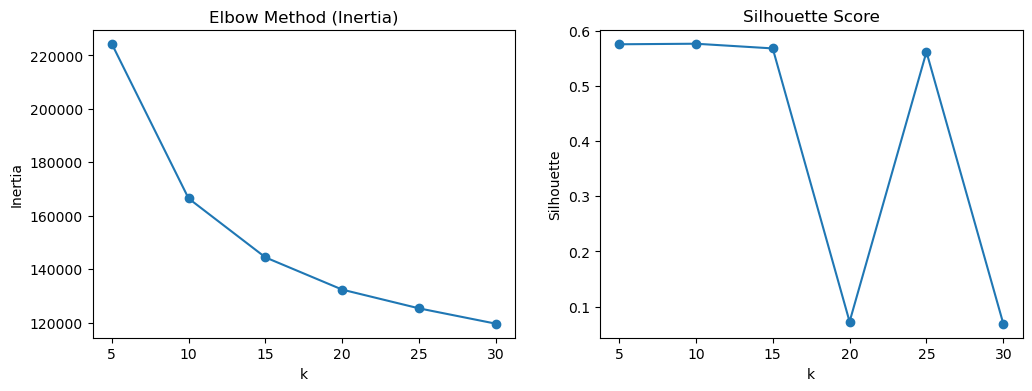

In [509]:
inertias = []
sil_scores = []
K_values = range(5, 31, 5)  # coba k=5,10,15,20,25,30

for k in K_values:
    print(f"Training KMeans for k={k}...")
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_food)
    
    inertias.append(km.inertia_)
    
    labels = km.labels_
    sil = silhouette_score(X_food, labels)
    sil_scores.append(sil)
    print(f"  Silhouette Score: {sil:.4f}")

# Plot
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(K_values, inertias, '-o')
plt.title("Elbow Method (Inertia)")
plt.xlabel("k")
plt.ylabel("Inertia")

plt.subplot(1,2,2)
plt.plot(K_values, sil_scores, '-o')
plt.title("Silhouette Score")
plt.xlabel("k")
plt.ylabel("Silhouette")

plt.show()

#### Train with KMeans

In [510]:
best_k = 10

kmeans = KMeans(n_clusters=best_k, random_state=42)
df_merged['cluster'] = kmeans.fit_predict(X_food)

#### Analisis Setelah Clustering

In [511]:
df_merged["cluster"].value_counts().sort_index()

cluster
0    9309
1     124
2     265
3    1234
4     566
5     108
6     446
7     130
8     400
9     911
Name: count, dtype: int64

In [512]:
for c in range(best_k):
    print(f"\n===== Cluster {c} =====")
    print(df_merged[df_merged.cluster == c]["Title"].head(10).tolist())



===== Cluster 0 =====
['Miso-Butter Roast Chicken With Acorn Squash Panzanella', 'Crispy Salt and Pepper Potatoes', 'Thanksgiving Mac and Cheese', "Newton's Law", 'Warm Comfort', 'Apples and Oranges', 'Turmeric Hot Toddy', 'Instant Pot Lamb Haleem', 'Spiced Lentil and Caramelized Onion Baked Eggs', 'Hot Pimento Cheese Dip']

===== Cluster 1 =====
['Chicken Fricassée with Lemon Mustard Sauce', 'Porcini-Rubbed Beef Rib Roast', "Nellie & Joe's Key Lime Pie", 'Slow-Cooker Marrakech Chicken Stew With Preserved Lemon and Olives', 'Sautéed Chicken Breasts With Country Ham and Sage Sauce', 'Spanish-Style Fried Chicken with Grilled Avocado', 'Country-Style Pork Ribs with Bourbon and Coke BBQ Sauce', 'Peruvian-Style Roast Chicken with Tangy Green Sauce', 'Buttery Roast Chicken', 'Grain Bowls with Chicken, Spiced Chickpeas, and Avocado']

===== Cluster 2 =====
['Moroccan Lamb Stew', "My Mother's Brisket", 'Leg of Lamb with Garlic and Rosemary', 'Roasted Quinoa and Tomato Soup With Parmesan Wafer

### Evaluation Metric

In [513]:
# Silhoutte score global
sil_score = silhouette_score(X_food, df_merged["cluster"])
print(sil_score)

0.5769327923347757


In [514]:
# Silhoutte score per cluster
sample_scores = silhouette_samples(X_food, df_merged["cluster"])
df_merged["sil_score"] = sample_scores

df_merged.groupby("cluster")["sil_score"].mean()

cluster
0    0.780803
1    0.179954
2    0.139099
3    0.181970
4    0.071899
5    0.236332
6    0.104801
7    0.136202
8    0.121575
9    0.058221
Name: sil_score, dtype: float64

In [515]:
# Davies–Bouldin Index (DBI)
dbi = davies_bouldin_score(X_food, df_merged["cluster"])
print(dbi)

1.559218477774597


In [516]:
# Calinski–Harabasz Index (CH Score)
ch = calinski_harabasz_score(X_food, df_merged['cluster'])
print(ch)

4322.738372183844


#### Visualization

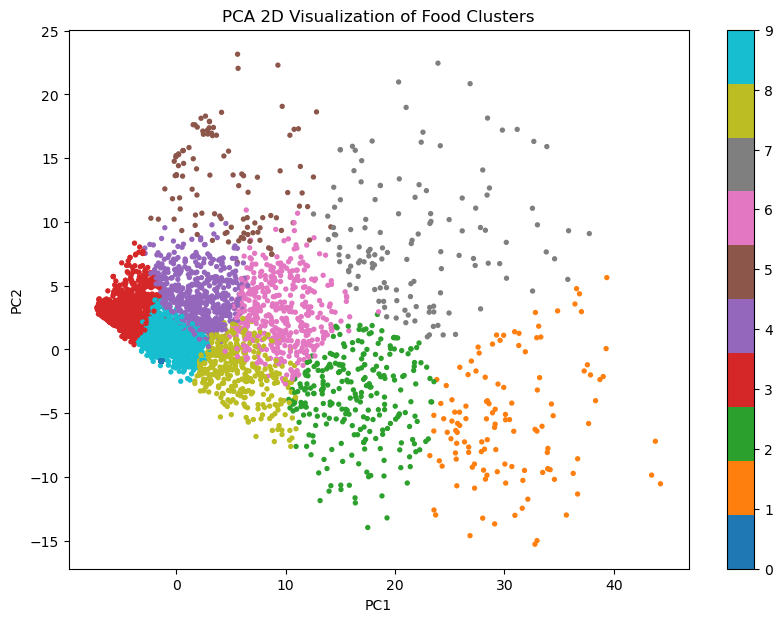

In [517]:
# PCA 2D PLOT
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_food)

plt.figure(figsize=(10,7))
plt.scatter(X_pca[:,0], X_pca[:,1], c=df_merged["cluster"], cmap="tab10", s=8)
plt.colorbar()
plt.title("PCA 2D Visualization of Food Clusters")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

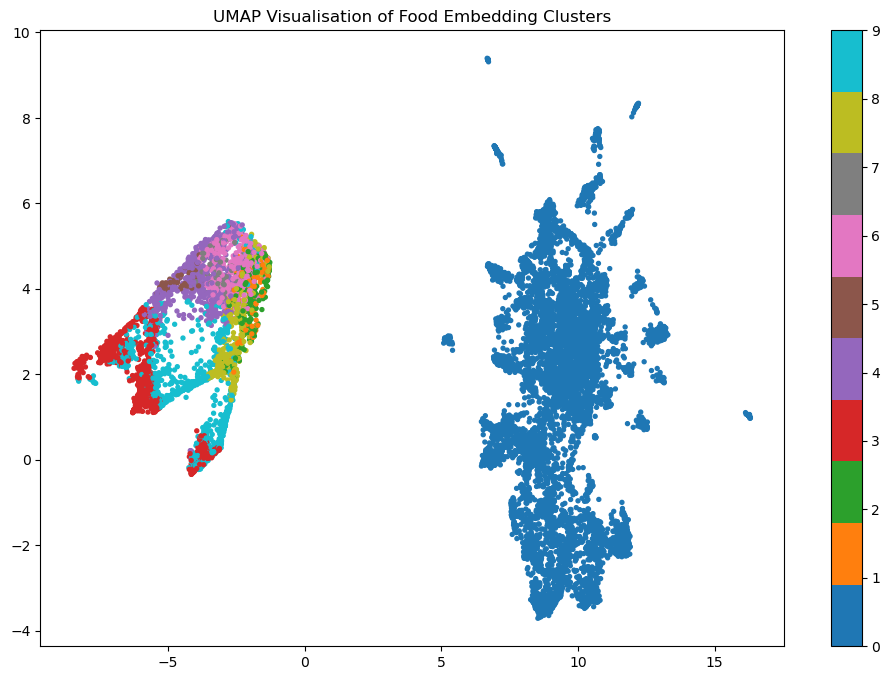

In [518]:
# UMAP 2D PLOT
reducer = umap.UMAP(n_neighbors=30, min_dist=0.1, metric='cosine')
X_umap = reducer.fit_transform(X_food)

plt.figure(figsize=(12,8))
plt.scatter(X_umap[:,0], X_umap[:,1], c=df_merged["cluster"], cmap='tab10', s=8)
plt.colorbar()
plt.title("UMAP Visualisation of Food Embedding Clusters")
plt.show()

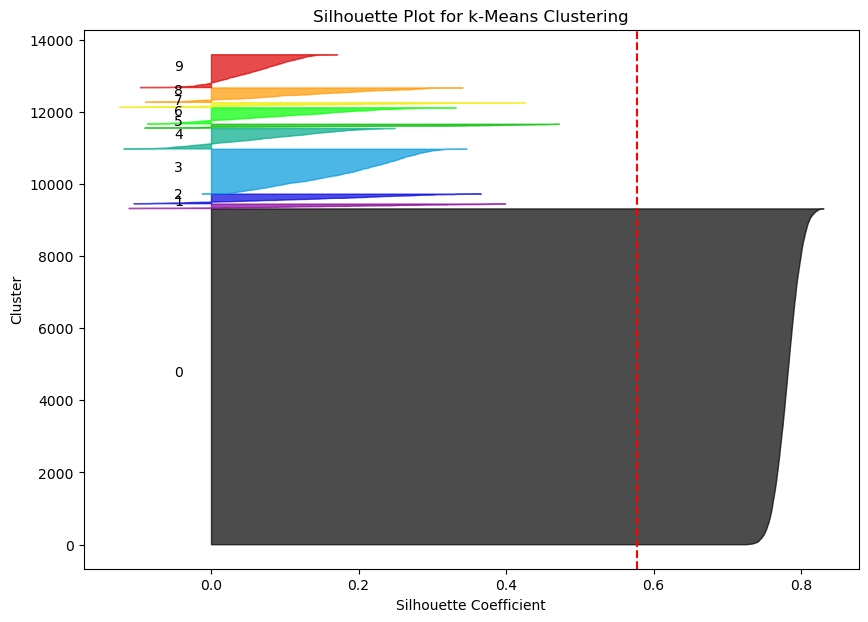

In [519]:
sample_scores = silhouette_samples(X_food, df_merged["cluster"])
y = df_merged["cluster"]

fig, ax = plt.subplots(figsize=(10,7))

y_lower = 10
for i in range(best_k):
    ith_scores = sample_scores[y == i]
    ith_scores.sort()

    size = ith_scores.shape[0]
    y_upper = y_lower + size
    
    color = cm.nipy_spectral(float(i) / best_k)
    ax.fill_betweenx(np.arange(y_lower, y_upper),
                     0, ith_scores,
                     facecolor=color, edgecolor=color, alpha=0.7)
    
    ax.text(-0.05, y_lower + size / 2, str(i))
    
    y_lower = y_upper + 10

ax.set_title("Silhouette Plot for k-Means Clustering")
ax.set_xlabel("Silhouette Coefficient")
ax.set_ylabel("Cluster")
plt.axvline(sil_score, color="red", linestyle="--")
plt.show()

#### Profiling Setiap Cluster

In [520]:
# Rata rata nutrition per cluster
df_merged.groupby("cluster")[nutri_cols].mean()

,calories,protein,fat,sodium
cluster,,,,
0,0.000000,0.000000,0.000000,0.000000
1,6.040274,5.378383,6.254290,2.767357
2,3.393624,2.897324,3.674546,1.023136
3,-0.967227,-0.418531,-0.922327,-0.481241
4,0.003838,0.679016,-0.045702,1.107083
5,-0.432619,0.376632,-0.507609,5.022997
6,1.458847,2.314240,1.127191,1.752266
7,3.067582,4.530664,2.112751,5.859962
8,1.570590,0.533742,1.630758,0.158882


In [521]:
# Rata rata tag binary
df_merged.groupby("cluster")[binary_cols[:20]].mean()  # lihat 20 pertama saja

,#cakeweek,22-minute meals,3-ingredient recipes,30 days of groceries,advance prep required,alabama,alaska,alcoholic,almond,amaretto,anchovy,anise,anniversary,anthony bourdain,aperitif,appetizer,apple,apple juice,apricot,arizona
cluster,,,,,,,,,,,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
1,0.000000,0.016129,0.000000,0.016129,0.032258,0.000000,0.0,0.000000,0.024194,0.000000,0.008065,0.000000,0.008065,0.000000,0.0,0.008065,0.016129,0.000000,0.000000,0.0
2,0.003774,0.003774,0.007547,0.000000,0.018868,0.000000,0.0,0.003774,0.033962,0.007547,0.007547,0.000000,0.007547,0.003774,0.0,0.030189,0.011321,0.000000,0.022642,0.0
3,0.000000,0.000000,0.004862,0.000000,0.008104,0.000000,0.0,0.113452,0.026742,0.000810,0.004052,0.010535,0.006483,0.000000,0.0,0.104538,0.033225,0.000810,0.009724,0.0
4,0.000000,0.003534,0.007067,0.001767,0.010601,0.000000,0.0,0.000000,0.014134,0.000000,0.007067,0.003534,0.007067,0.000000,0.0,0.130742,0.019435,0.000000,0.001767,0.0
5,0.000000,0.009259,0.009259,0.000000,0.018519,0.000000,0.0,0.009259,0.000000,0.000000,0.000000,0.018519,0.009259,0.000000,0.0,0.129630,0.009259,0.000000,0.000000,0.0
6,0.000000,0.011211,0.002242,0.006726,0.006726,0.000000,0.0,0.000000,0.006726,0.000000,0.000000,0.004484,0.008969,0.002242,0.0,0.035874,0.011211,0.002242,0.004484,0.0
7,0.000000,0.015385,0.007692,0.007692,0.038462,0.000000,0.0,0.000000,0.007692,0.000000,0.000000,0.015385,0.030769,0.000000,0.0,0.046154,0.007692,0.000000,0.000000,0.0
8,0.002500,0.000000,0.005000,0.000000,0.012500,0.000000,0.0,0.002500,0.052500,0.002500,0.017500,0.002500,0.012500,0.000000,0.0,0.037500,0.037500,0.000000,0.017500,0.0


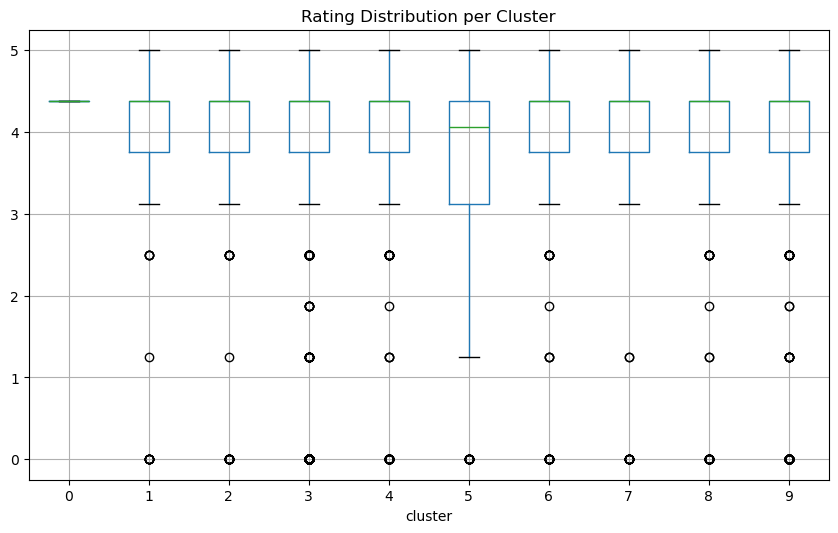

In [522]:
# Distribusi Rating
df_merged.boxplot(column="rating", by="cluster", figsize=(10,6))
plt.title("Rating Distribution per Cluster")
plt.suptitle("")
plt.show()


## Saved Model

In [ ]:
# # Model
# joblib.dump(kmeans, "kmeans_tfidf_v1.pkl")

# # Vectorizer
# text_pipeline = Pipeline([
#     ("tfidf", tfidf),
#     ("svd", svd)
# ])
# joblib.dump(text_pipeline, "text_embedding_pipeline_v1.pkl")

# # Scaler
# joblib.dump(scaler, "scaler_nutrition_v1.pkl")

# # CSV
# df_merged.to_csv("df_merged_kmeans_tfidf_v1.csv", index=False)
